### COLEGIO DE CIENCIAS E INGENIERIA

### INGENIERIA INDUSTRIAL

### IIN-3007E Business Analytics

### NRC: 1458

### Final Submission

### SEMESTRE: Segundo Semestre 2024-2025 (202420)

### NOMBRE(S) Y CÓDIGO DE ESTUDIANTE(S):

### Felipe Suquillo 00329366
### Esteban Cartagenova 00331513

### PROFESOR(A):
### María Gabriela Baldeón Calisto


### FECHA DE ENTREGA:  29th April 2025

### 1. Perform an Exploratory Data Analysis (EDA) in Python, you must include at least the following points:
### 1.1 Give a general description of the database, including size, data types, null/blank values, outliers, atypical values.

In [3]:
import pandas as pd

# Load the dataset
df_raw = pd.read_csv("SEER Breast Cancer Dataset .csv")

# Size and data types of the dataset
print("Dataset Shape (Rows, Columns):", df_raw.shape)
print("\nData Types of Each Column:\n", df_raw.dtypes)
print("\n")

# Remove leading and trailing spaces from column names  
# This will ensure that column names are clean and don't have any unintended spaces before or after them
df_raw.columns = df_raw.columns.str.strip() 

# Missing and Blank Values Analysis
# Count null values per column
null_values = df_raw.isnull().sum()
print("Null values per column:\n", null_values[null_values > 0])

# Count blank values (whitespace-only) in object (string) columns
blank_values = df_raw.apply(lambda x: x.str.isspace().sum() if x.dtype == "object" else 0)
print("\nBlank (whitespace-only) values per column:\n", blank_values[blank_values > 0])

# Outlier Detection using IQR
def detect_outliers_iqr(df):
    outlier_counts = {}  # Store number of outliers per column
    for col in df.select_dtypes(include=['number']).columns:  # Only numeric columns
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_counts[col] = len(outliers)  # Count of outliers
    return outlier_counts
print("\n")

# Get and print outliers count per column
outlier_counts = detect_outliers_iqr(df_raw)
for col, count in outlier_counts.items():
    if count > 0:
        print(f"Column {col}: {count} outliers detected")
print("\n")

# Get unique values for each non-numeric column
non_numeric_cols = df_raw.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    unique_values = df_raw[col].unique()
    print(f"Column: {col}")
    print(f"Possible values: {unique_values}")
    print("-" * 40)

Dataset Shape (Rows, Columns): (4024, 16)

Data Types of Each Column:
 Age                         int64
Race                       object
Marital Status             object
Unnamed: 3                float64
T Stage                    object
N Stage                    object
6th Stage                  object
Grade                      object
A Stage                    object
Tumor Size                  int64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined      int64
Regional Node Positive      int64
Survival Months             int64
Status                     object
dtype: object


Null values per column:
 Race            13
Unnamed: 3    4024
dtype: int64

Blank (whitespace-only) values per column:
 Series([], dtype: int64)


Column Age: 2 outliers detected
Column Tumor Size: 224 outliers detected
Column Regional Node Examined: 72 outliers detected
Column Regional Node Positive: 346 outliers detected
Column Survival Months: 18 outliers detecte

### 1.2 Detail the criteria used to detect outliers. How where the outliers, null values, and atypical values handled (if applicable): What was done with them? Why? Add references to justify the cleaning process.

#### Delete registers with unpossible values and replace values correctly

In [6]:
# Reemplazar "Split up" con "Separated" en la columna "Marital Status"
df_raw["Marital Status"] = df_raw["Marital Status"].replace("Split up", "Separated")

# Eliminar filas donde la columna "Grade" contiene valores no deseados
unwanted_grades = ['jluky', 'cfjfdit', 'ijkhliuy', 'cfhgdk', 'jjjjj']
removed_grade_count = df_raw[df_raw["Grade"].isin(unwanted_grades)].shape[0]
df_raw = df_raw[~df_raw["Grade"].isin(unwanted_grades)]

# Calcular % de registros eliminados de "Progesterone Status" (Neutral)
neutral_percentage = df_raw[df_raw["Progesterone Status"] == "Neutral"].shape[0] * 100 / 4024
print(f"Neutral Percentage: {neutral_percentage:.2f}%")

# Eliminar filas donde "Progesterone Status" es "Neutral"
df_raw = df_raw[df_raw["Progesterone Status"] != "Neutral"]

# Calcular % de registros eliminados de "Grade"
grade_percentage = removed_grade_count * 100 / 4024
print(f"Grade Percentage: {grade_percentage:.2f}%")

# Reemplazar "Not dead" con "Alive" en la columna "Status"
df_raw["Status"] = df_raw["Status"].replace("Not dead", "Alive")

# Verificar valores únicos en cada columna no numérica
non_numeric_cols = df_raw.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    unique_values = df_raw[col].unique()
    print(f"Column: {col}")
    print(f"Possible values: {unique_values}")
    print("-" * 40)

Neutral Percentage: 0.12%
Grade Percentage: 0.12%
Column: Race
Possible values: ['White' 'Other (American Indian/AK Native, Asian/Pacific Islander)'
 'Black' nan]
----------------------------------------
Column: Marital Status
Possible values: ['Married (including common law)' 'Single (never married)' 'Divorced'
 'Widowed' 'Separated']
----------------------------------------
Column: T Stage
Possible values: ['T1' 'T2' 'T3' 'T4']
----------------------------------------
Column: N Stage
Possible values: ['N1' 'N2' 'N3']
----------------------------------------
Column: 6th Stage
Possible values: ['IIA' 'IIIA' 'IIB' 'IIIC' 'IIIB']
----------------------------------------
Column: Grade
Possible values: ['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
----------------------------------------
Column: A Stage
Possible values: ['Regional' 'Distant']
----------------------------------------
Column

### Missing Values

In [8]:
import pandas as pd
import numpy as np

# Count specific values in the 'Race' column, including NaN values
race_counts = df_raw['Race'].value_counts(dropna=False)

# Calculate relative frequency and percentage frequency
race_relative = race_counts / race_counts.sum()
race_percentage = race_relative * 100

# Create a DataFrame to display the results
race_table = pd.DataFrame({
    'Absolute Frequency': race_counts,
    'Relative Frequency': race_relative,
    'Percentage Frequency (%)': race_percentage
})

# Display the table
race_table

,Absolute Frequency,Relative Frequency,Percentage Frequency (%)
Race,,,
White,3394,0.845541,84.554061
"Other (American Indian/AK Native, Asian/Pacific Islander)",318,0.079223,7.922272
Black,289,0.071998,7.199801
NaN,13,0.003239,0.323866


We decided to eliminate the records with missing values of "Race" based on Shmueli et al (2016), who states: "If the number of records with missing values is small, those records might be omitted" (p. 26). Additionally, as we discussed in class, "delete if there are few observations and the database is large" (Baldeón, 2025). In this case, missing values in the Race column represent 0.32% of the data, so we omitted them. Also, the column "Unnamed: 3" was deleted, because all the values were NaN.

In [10]:
# Drop the column 'Unnamed: 3'  
df_raw.drop(['Unnamed: 3'], axis=1, inplace=True)

# Remove rows with null values 
df_raw1 = df_raw.dropna()

# Show the cleaned DataFrame
df_raw1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,28,Positive,Positive,19,7,74,Alive
2,30,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N1,IIB,Moderately differentiated; Grade II,Regional,25,Positive,Positive,15,3,78,Alive
3,31,White,Divorced,T2,N1,IIB,Moderately differentiated; Grade II,Regional,42,Positive,Positive,9,3,5,Alive
4,31,Black,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,30,Positive,Positive,16,1,52,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,69,White,Married (including common law),T3,N1,IIIA,Poorly differentiated; Grade III,Regional,60,Positive,Positive,21,9,82,Dead
4019,69,White,Divorced,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,74,Positive,Positive,12,1,83,Dead
4020,69,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,16,Positive,Positive,12,6,85,Dead
4021,69,White,Single (never married),T3,N1,IIIA,Moderately differentiated; Grade II,Regional,55,Positive,Positive,13,2,86,Dead


### Outliers

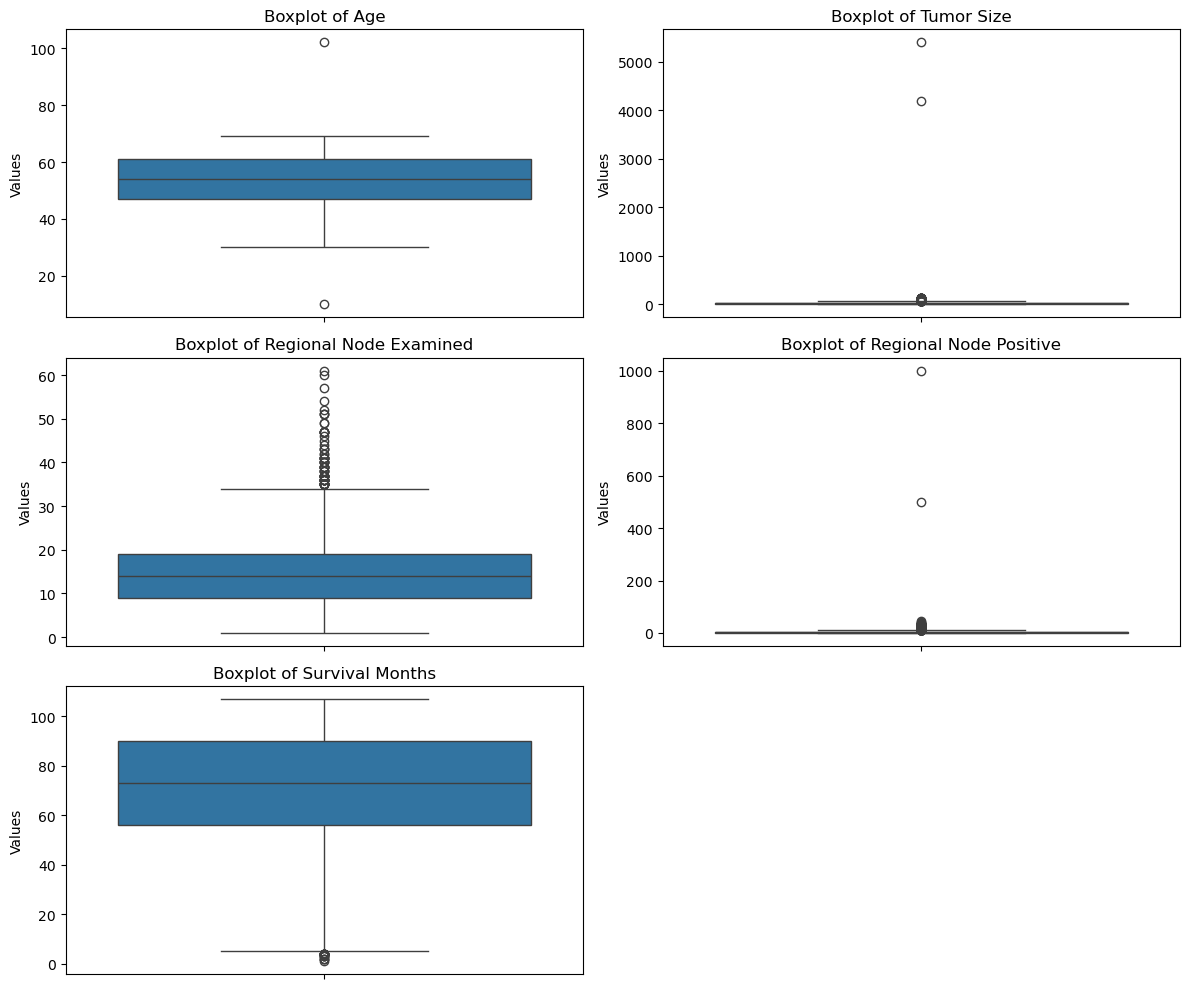

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

# Create individual boxplots for each column
plt.figure(figsize=(12, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)  # Arrange in a 3x2 grid
    sns.boxplot(data=df_raw1[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

#### Age

In [14]:
print("min:",df_raw1["Age"].min(), "max:",df_raw1["Age"].max())

min: 10 max: 102


As 10 and 102 years old are possible ages, we decided to maintain those outliers, considering that there are only two and they align with the distribution. As Shmueli (2016) explains, "an outlier is not necessarily an invalid data point, it is just a distant one [...]. Or, we might conclude that the value is within the realm of possibility and leave it alone" (p. 26).

#### Tumor Size
A study titled STUDY OF BREAST CANCER AND ITS RELATIONSHIP WITH LYMPHATIC NODE METASTATIC BURDEN in El Salvador found that the average tumor size in the patients analyzed was 4.8cm (Estrada et al., 2024). Therefore, the two highest values have no medical meaning. Therefore, it was decided to eliminate those records, and analyze again.

In [17]:
# Get the indices of the two records with the highest values in "Tumor Size"
top_2_indices = df_raw1["Tumor Size"].nlargest(2).index

# Show the records corresponding to those indices
top_2_records = df_raw1.loc[top_2_indices]

# Verify the records
top_2_records

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
1984,56,White,Married (including common law),T3,N1,IIIA,Moderately differentiated; Grade II,Regional,5400,Positive,Positive,21,1,88,Alive
1961,56,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,4200,Positive,Negative,10,2,78,Alive


In [18]:
# Remove those records from the DataFrame
# The drop() function removes the rows that have the indices specified in top_2_indices.
# In this case, we are removing the two records with the highest "Tumor Size" values.
df_raw1 = df_raw1.drop(top_2_indices)

In [19]:
# Check result
# Get the indices of the two records with new highest values in "Tumor Size"
top_2_indices1 = df_raw1["Tumor Size"].nlargest(2).index

# Show the records corresponding to those indices
top_2_records1 = df_raw1.loc[top_2_indices1]

# Verify the records
top_2_records1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
793,47,White,Married (including common law),T3,N2,IIIA,Well differentiated; Grade I,Regional,140,Positive,Positive,23,7,64,Alive
1041,49,White,Married (including common law),T3,N1,IIIA,Moderately differentiated; Grade II,Regional,140,Positive,Positive,14,2,48,Alive


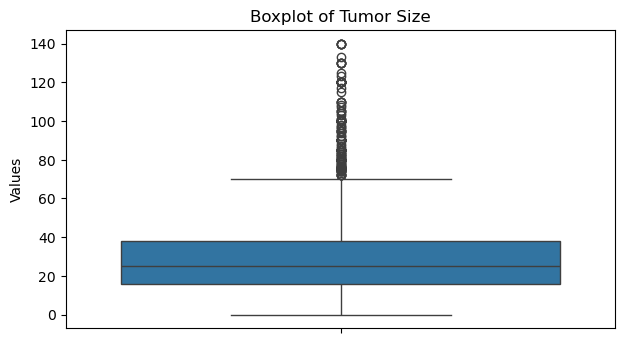

In [20]:
# Create the new boxplot
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, i)  # Arrange in a 3x2 grid
sns.boxplot(data=df_raw1["Tumor Size"])
plt.title('Boxplot of Tumor Size')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

#### Regional Node Positive
In this case, there is no possible scenario where Regional Nodes Positive is greater than Regional Nodes Examined. Therefore, those records were eliminated.

In [22]:
# Identify invalid records where 'Regional Node Positive' is greater than 'Regional Node Examined'
invalid_indices = df_raw1[df_raw1['Regional Node Positive'] > df_raw1['Regional Node Examined']].index

# Display the invalid records
invalid_records = df_raw1.loc[invalid_indices]

# Print invalid records
invalid_records

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
233,40,White,Married (including common law),T3,N1,IIIA,Moderately differentiated; Grade II,Regional,60,Negative,Negative,17,1000,89,Alive
1083,49,White,Married (including common law),T3,N2,IIIA,Moderately differentiated; Grade II,Regional,52,Positive,Negative,32,500,68,Alive


In [23]:
# Delete the invalid records
df_raw1 = df_raw1.drop(invalid_indices)

# Verify that the records were deleted correctly
print(df_raw1[df_raw1['Regional Node Positive'] > df_raw1['Regional Node Examined']])

Empty DataFrame
Columns: [Age, Race, Marital Status, T Stage, N Stage, 6th Stage, Grade, A Stage, Tumor Size, Estrogen Status, Progesterone Status, Regional Node Examined, Regional Node Positive, Survival Months, Status]
Index: []


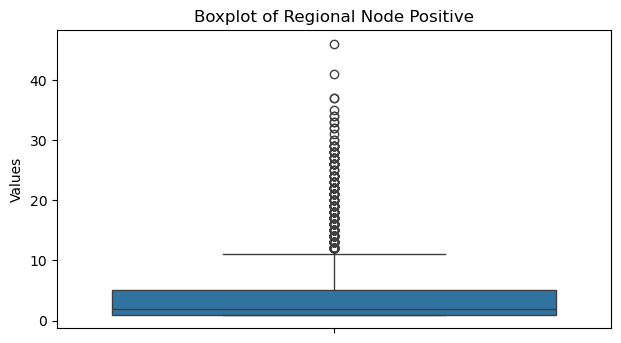

In [24]:
# Create the new boxplot
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, i)  # Arrange in a 3x2 grid
sns.boxplot(data=df_raw1["Regional Node Positive"])
plt.title('Boxplot of Regional Node Positive')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

#### New outliers 

In [26]:
# Obtener la cantidad total de registros
total_rows = len(df_raw1)

# Obtener y calcular el porcentaje de outliers por columna
outlier_counts = detect_outliers_iqr(df_raw1)

for col, count in outlier_counts.items():
    if count > 0:
        percentage = (count / total_rows) * 100
        print(f"{col}: {count} outliers detected ({percentage:.2f}%)")

Age: 2 outliers detected (0.05%)
Tumor Size: 222 outliers detected (5.55%)
Regional Node Examined: 72 outliers detected (1.80%)
Regional Node Positive: 342 outliers detected (8.56%)
Survival Months: 18 outliers detected (0.45%)


#### Winzorization sensitive analysis

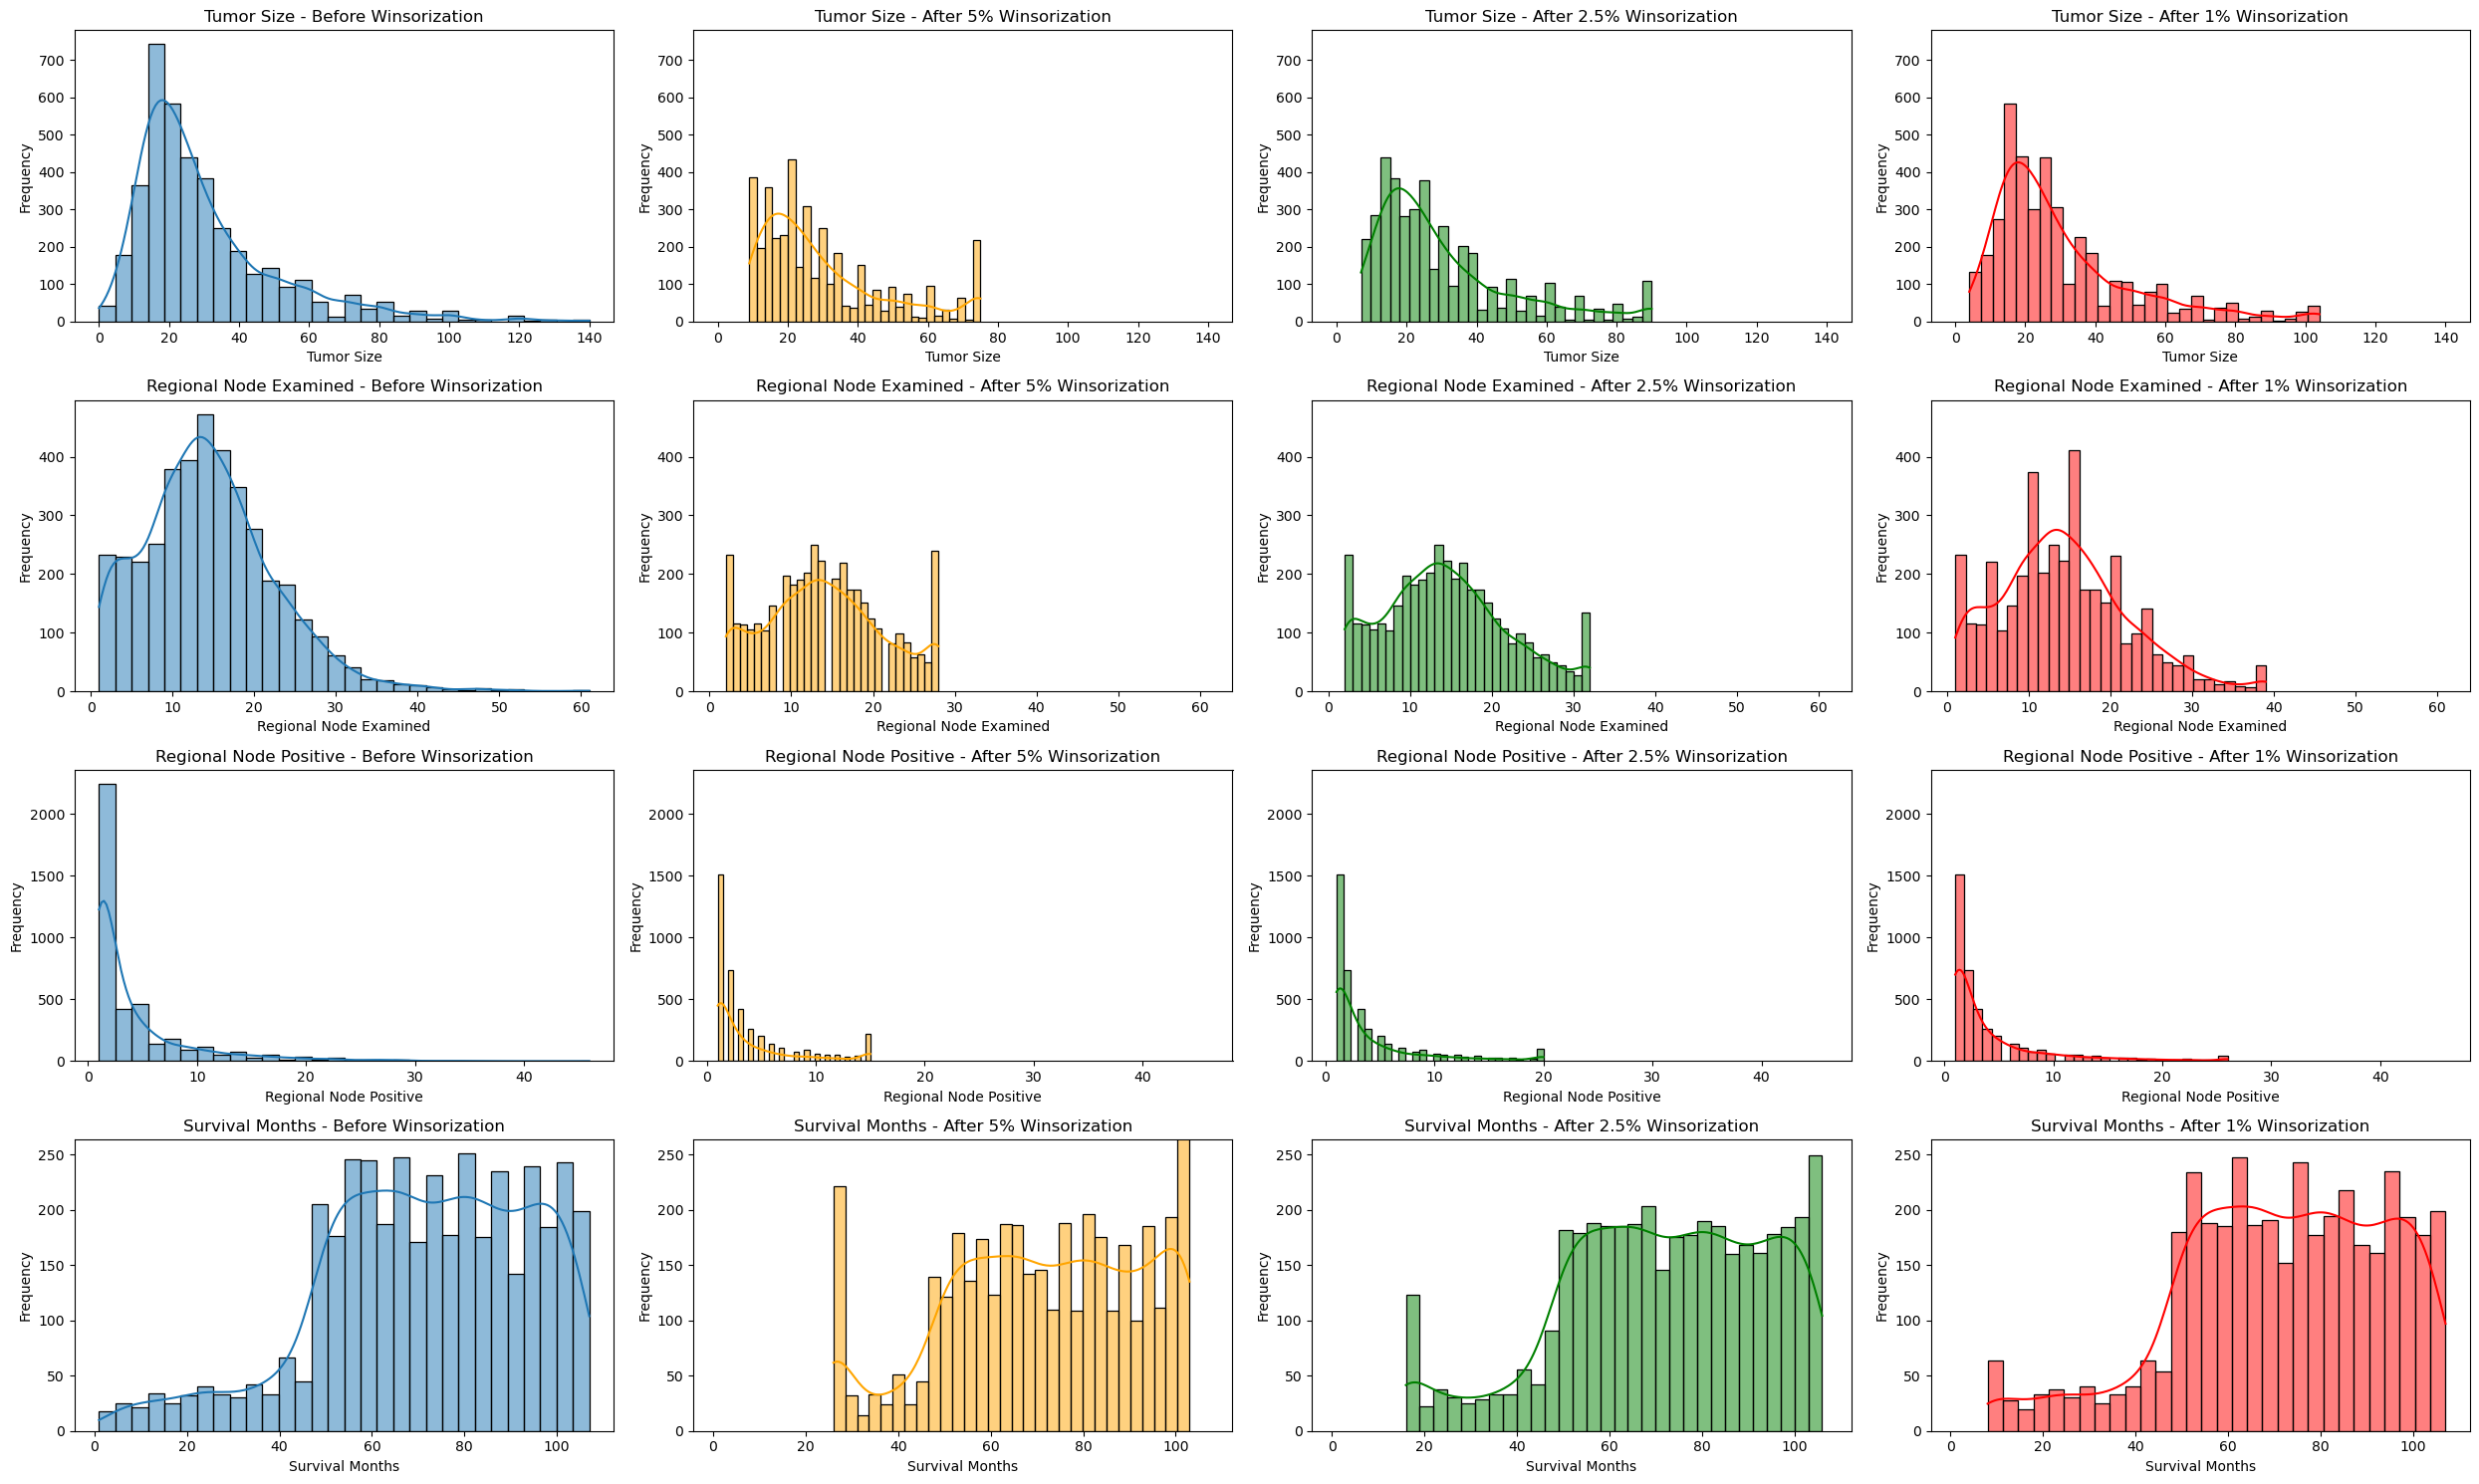

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to plot
columns = ['Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

# Create a figure to compare histograms before and after Winsorization
plt.figure(figsize=(25, 15))

for i, column in enumerate(columns, 1):
    # Plot the histogram before Winsorization
    plt.subplot(len(columns), 4, 4*i - 3)
    sns.histplot(df_raw1[column], kde=True, bins=30)
    plt.title(f'{column} - Before Winsorization')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    
    # Get the X and Y axis limits for the "Before" plot
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()

    # Apply Winsorization at 5% and plot afterward
    winsorized_5 = winsorize(df_raw1[column], limits=[0.05, 0.05])  # 5% (2.5% on each end)
    plt.subplot(len(columns), 4, 4*i - 2)
    sns.histplot(winsorized_5, kde=True, bins=30, color='orange')
    plt.title(f'{column} - After 5% Winsorization')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.xlim(x_min, x_max)  # Keep the same X scale as "Before"
    plt.ylim(y_min, y_max)  # Keep the same Y scale as "Before"

    # Apply Winsorization at 2.5% and plot afterward
    winsorized_2_5 = winsorize(df_raw1[column], limits=[0.025, 0.025])  # 2.5% (1.25% on each end)
    plt.subplot(len(columns), 4, 4*i - 1)
    sns.histplot(winsorized_2_5, kde=True, bins=30, color='green')
    plt.title(f'{column} - After 2.5% Winsorization')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.xlim(x_min, x_max)  # Keep the same X scale as "Before"
    plt.ylim(y_min, y_max)  # Keep the same Y scale as "Before"

    # Apply Winsorization at 1% and plot afterward
    winsorized_1 = winsorize(df_raw1[column], limits=[0.01, 0.01])  # 1% (0.5% on each end)
    plt.subplot(len(columns), 4, 4*i)
    sns.histplot(winsorized_1, kde=True, bins=30, color='red')
    plt.title(f'{column} - After 1% Winsorization')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')
    plt.xlim(x_min, x_max)  # Keep the same X scale as "Before"
    plt.ylim(y_min, y_max)  # Keep the same Y scale as "Before"

# Adjust figure layout
plt.tight_layout()
plt.show()

#### Winzorization
Applying 1% Winsorization to tumor size data enhances statistical robustness by reducing the influence of extreme values while preserving relevant information. As Wilcox (2012) states, "Winsorizing is useful when the goal is to reduce the impact of extreme values, without discarding data that might be relevant" (p. 152). Given the medical nature of this study, we prioritized minimizing data transformation and applied 1% Winsorization only to variables with more than 1% of outliers: Tumor Size (5.55%), Regional Node Examined (1.80%), and Regional Node Positive (8.56%). This approach ensures reliable analyses while maintaining data integrity.

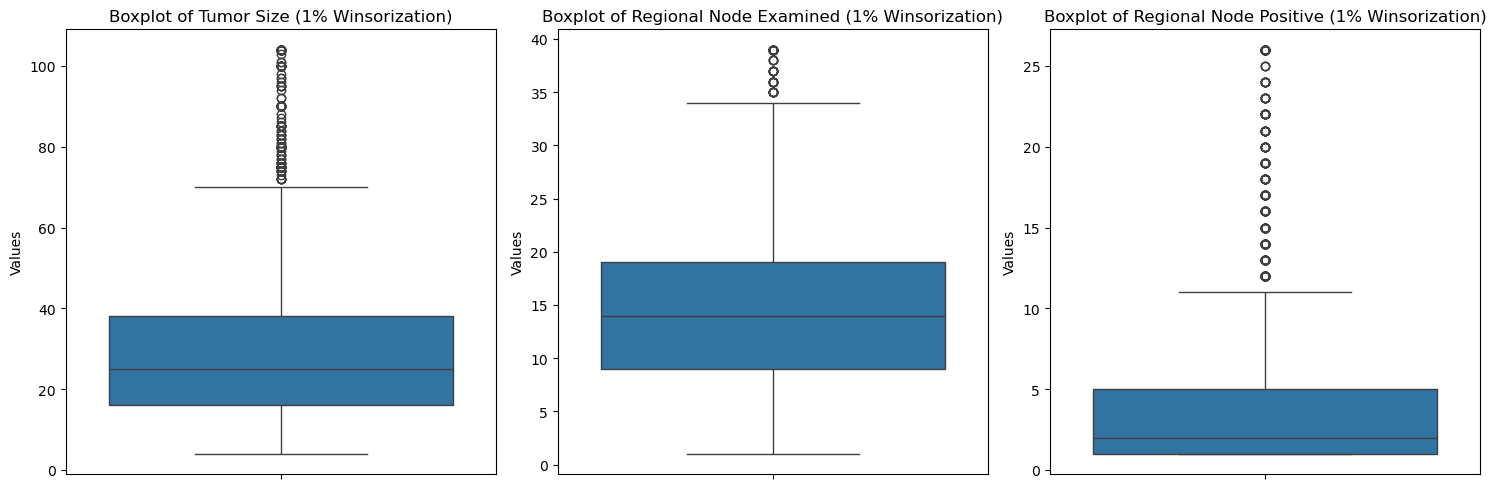

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Variables with more than 1% outliers
columns_to_winsorize = ["Tumor Size", "Regional Node Examined", "Regional Node Positive"]

# Create a figure
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_winsorize, 1):
    # Apply Winsorization at 1% (0.5% on each side)
    df_winsorized = df_raw1.copy()
    df_winsorized[column] = winsorize(df_raw1[column], limits=[0.01, 0.01])
    
    # Boxplot after Winsorization
    plt.subplot(1, len(columns_to_winsorize), i)
    sns.boxplot(data=df_winsorized[column])
    plt.title(f'Boxplot of {column} (1% Winsorization)')
    plt.ylabel('Values')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 1.3 Explore the correlation between all variables. Which variables seem to affect more the response variable and how?

In [32]:
# Check unique values for each non-numeric column
non_numeric_cols = df_raw1.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    unique_values = df_raw1[col].unique()
    print(f"Column: {col}")
    print(f"Possible values: {unique_values}")
    print("-" * 40)

Column: Race
Possible values: ['White' 'Other (American Indian/AK Native, Asian/Pacific Islander)'
 'Black']
----------------------------------------
Column: Marital Status
Possible values: ['Married (including common law)' 'Single (never married)' 'Divorced'
 'Widowed' 'Separated']
----------------------------------------
Column: T Stage
Possible values: ['T1' 'T2' 'T3' 'T4']
----------------------------------------
Column: N Stage
Possible values: ['N1' 'N2' 'N3']
----------------------------------------
Column: 6th Stage
Possible values: ['IIA' 'IIIA' 'IIB' 'IIIC' 'IIIB']
----------------------------------------
Column: Grade
Possible values: ['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
----------------------------------------
Column: A Stage
Possible values: ['Regional' 'Distant']
----------------------------------------
Column: Estrogen Status
Possible values: ['Positive' 'Negati

#### Ordinal Variables

In [34]:
# Create a copy for the dataframe
df_clean = df_raw1.copy()

# Define the mappings for ordinal variables (without "A Stage")
ordinal_mapping = {
    "T Stage": {"T1": 1, "T2": 2, "T3": 3, "T4": 4},
    "N Stage": {"N1": 1, "N2": 2, "N3": 3},
    "6th Stage": {"IIA": 1, "IIB": 2, "IIIA": 3, "IIIB": 4, "IIIC": 5},
    "Grade": {
        "Well differentiated; Grade I": 1, 
        "Moderately differentiated; Grade II": 2, 
        "Poorly differentiated; Grade III": 3, 
        "Undifferentiated; anaplastic; Grade IV": 4
    }
}

# Apply the numerical encoding
for col, mapping in ordinal_mapping.items():
    if col in df_clean.columns:  # Ensure the column exists in the dataframe
        df_clean[col] = df_clean[col].map(mapping)

# Check the changes
df_clean.head(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,10,White,Married (including common law),1,1,1,2,Regional,9,Positive,Positive,16,1,69,Alive
1,30,White,Single (never married),2,2,3,2,Regional,28,Positive,Positive,19,7,74,Alive


#### Nominal Variables

In [36]:
# Select the nominal categorical columns
nominal_columns = [
    "Race", 
    "Marital Status",   
    "Estrogen Status", 
    "Progesterone Status", 
    "Status",
    "A Stage"
]

# Apply pd.get_dummies to convert the variables into dummy variables
df_clean_dummies = pd.get_dummies(df_clean, columns=nominal_columns, drop_first=True)

# Verify the result
df_clean_dummies.head(2)

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead,A Stage_Regional
0,10,1,1,1,2,9,16,1,69,False,True,True,False,False,False,True,True,False,True
1,30,2,2,3,2,28,19,7,74,False,True,False,False,True,False,True,True,False,True


#### Correlation Matrix (Numerical vs Numerical)

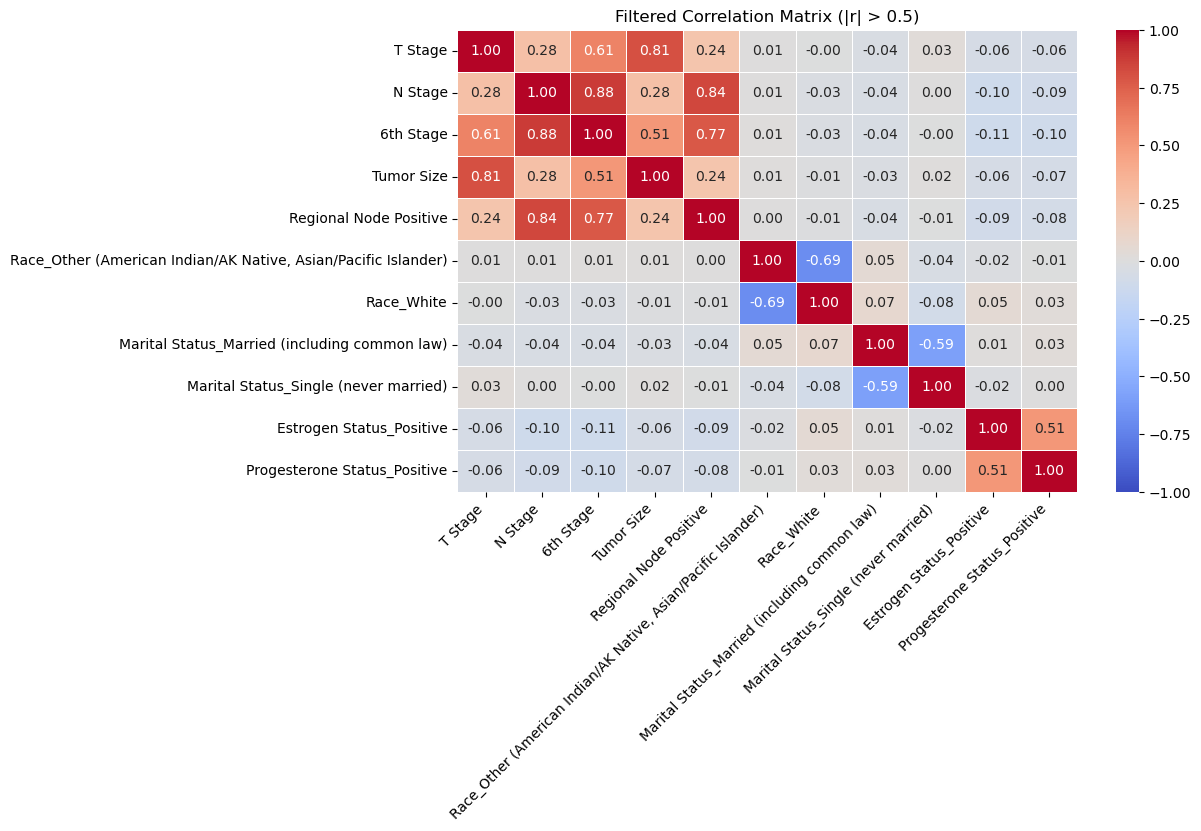

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert boolean to int (True=1, False=0) for correlation calculation
df_corr = df_clean_dummies.astype(int)

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Set diagonal to 0 to ignore self-correlations
corr_matrix_no_diag = corr_matrix.copy()
np.fill_diagonal(corr_matrix_no_diag.values, 0)

# Identify variables with at least one correlation > 0.5 or < -0.5 (excluding self-correlation)
relevant_vars = corr_matrix_no_diag.columns[(corr_matrix_no_diag.abs() > 0.5).any()]

# Filter matrix to only relevant variables
filtered_corr = corr_matrix.loc[relevant_vars, relevant_vars]

# Plot filtered heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Filtered Correlation Matrix (|r| > 0.5)")
plt.xticks(rotation=45, ha="right")
plt.show()

#### Point - Biserial Matrix (Numerical vs Binary)

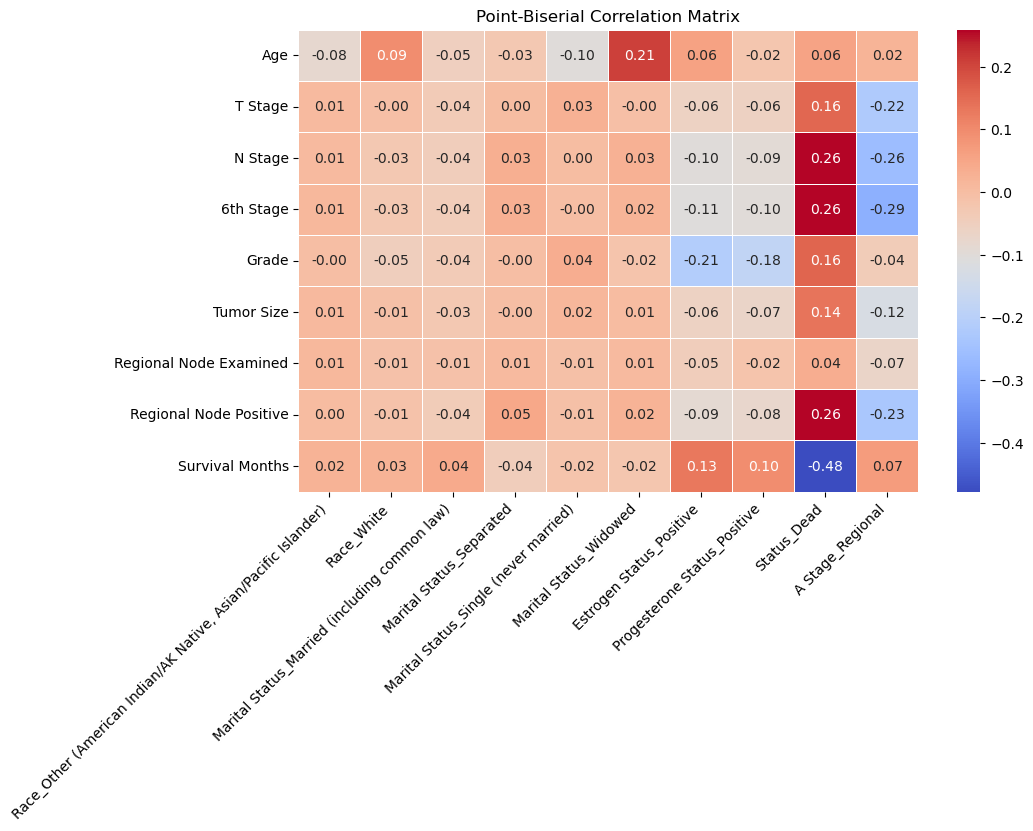

In [40]:
from scipy.stats import pointbiserialr

# Separar variables numéricas y binarias
numerical_vars = [
    "Age", "T Stage", "N Stage", "6th Stage", "Grade", 
    "Tumor Size", "Regional Node Examined", "Regional Node Positive", "Survival Months"
]

binary_vars = [
    "Race_Other (American Indian/AK Native, Asian/Pacific Islander)", "Race_White",
    "Marital Status_Married (including common law)", "Marital Status_Separated",
    "Marital Status_Single (never married)", "Marital Status_Widowed",
    "Estrogen Status_Positive", "Progesterone Status_Positive",
    "Status_Dead", "A Stage_Regional"
]

# Crear matriz de correlaciones vacía
corr_matrix = pd.DataFrame(index=numerical_vars, columns=binary_vars)

# Calcular correlaciones point-biserial
for num_var in numerical_vars:
    for bin_var in binary_vars:
        corr, p_value = pointbiserialr(df_clean_dummies[num_var], df_clean_dummies[bin_var].astype(int))
        corr_matrix.loc[num_var, bin_var] = corr

# Convertir a float
corr_matrix = corr_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Point-Biserial Correlation Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pointbiserialr.html

### 1.4 Data visualization: Visualize all predictor variables and analyze its distributions using appropriate visualization methods. Analyze the distribution of the response variable.

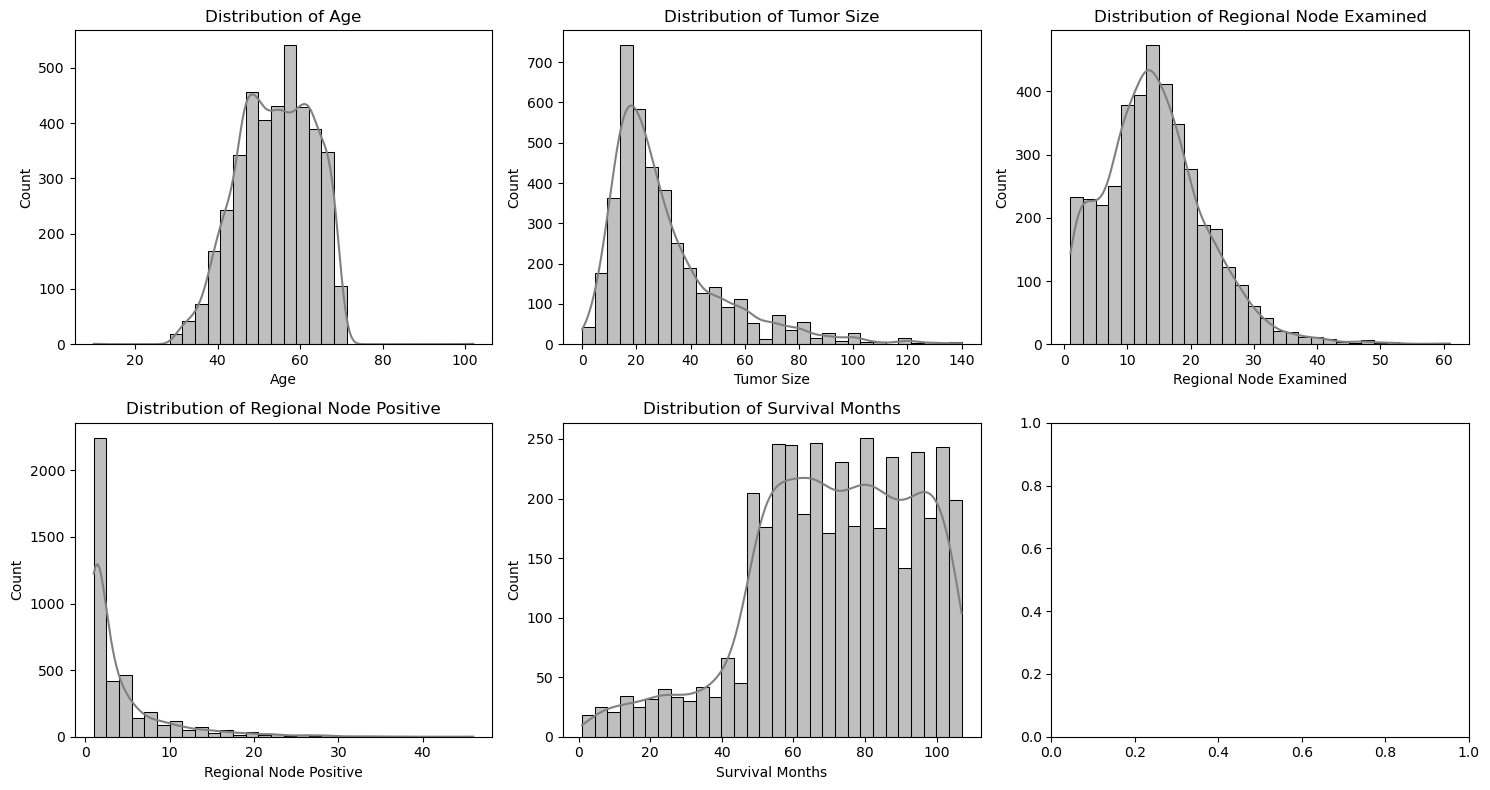

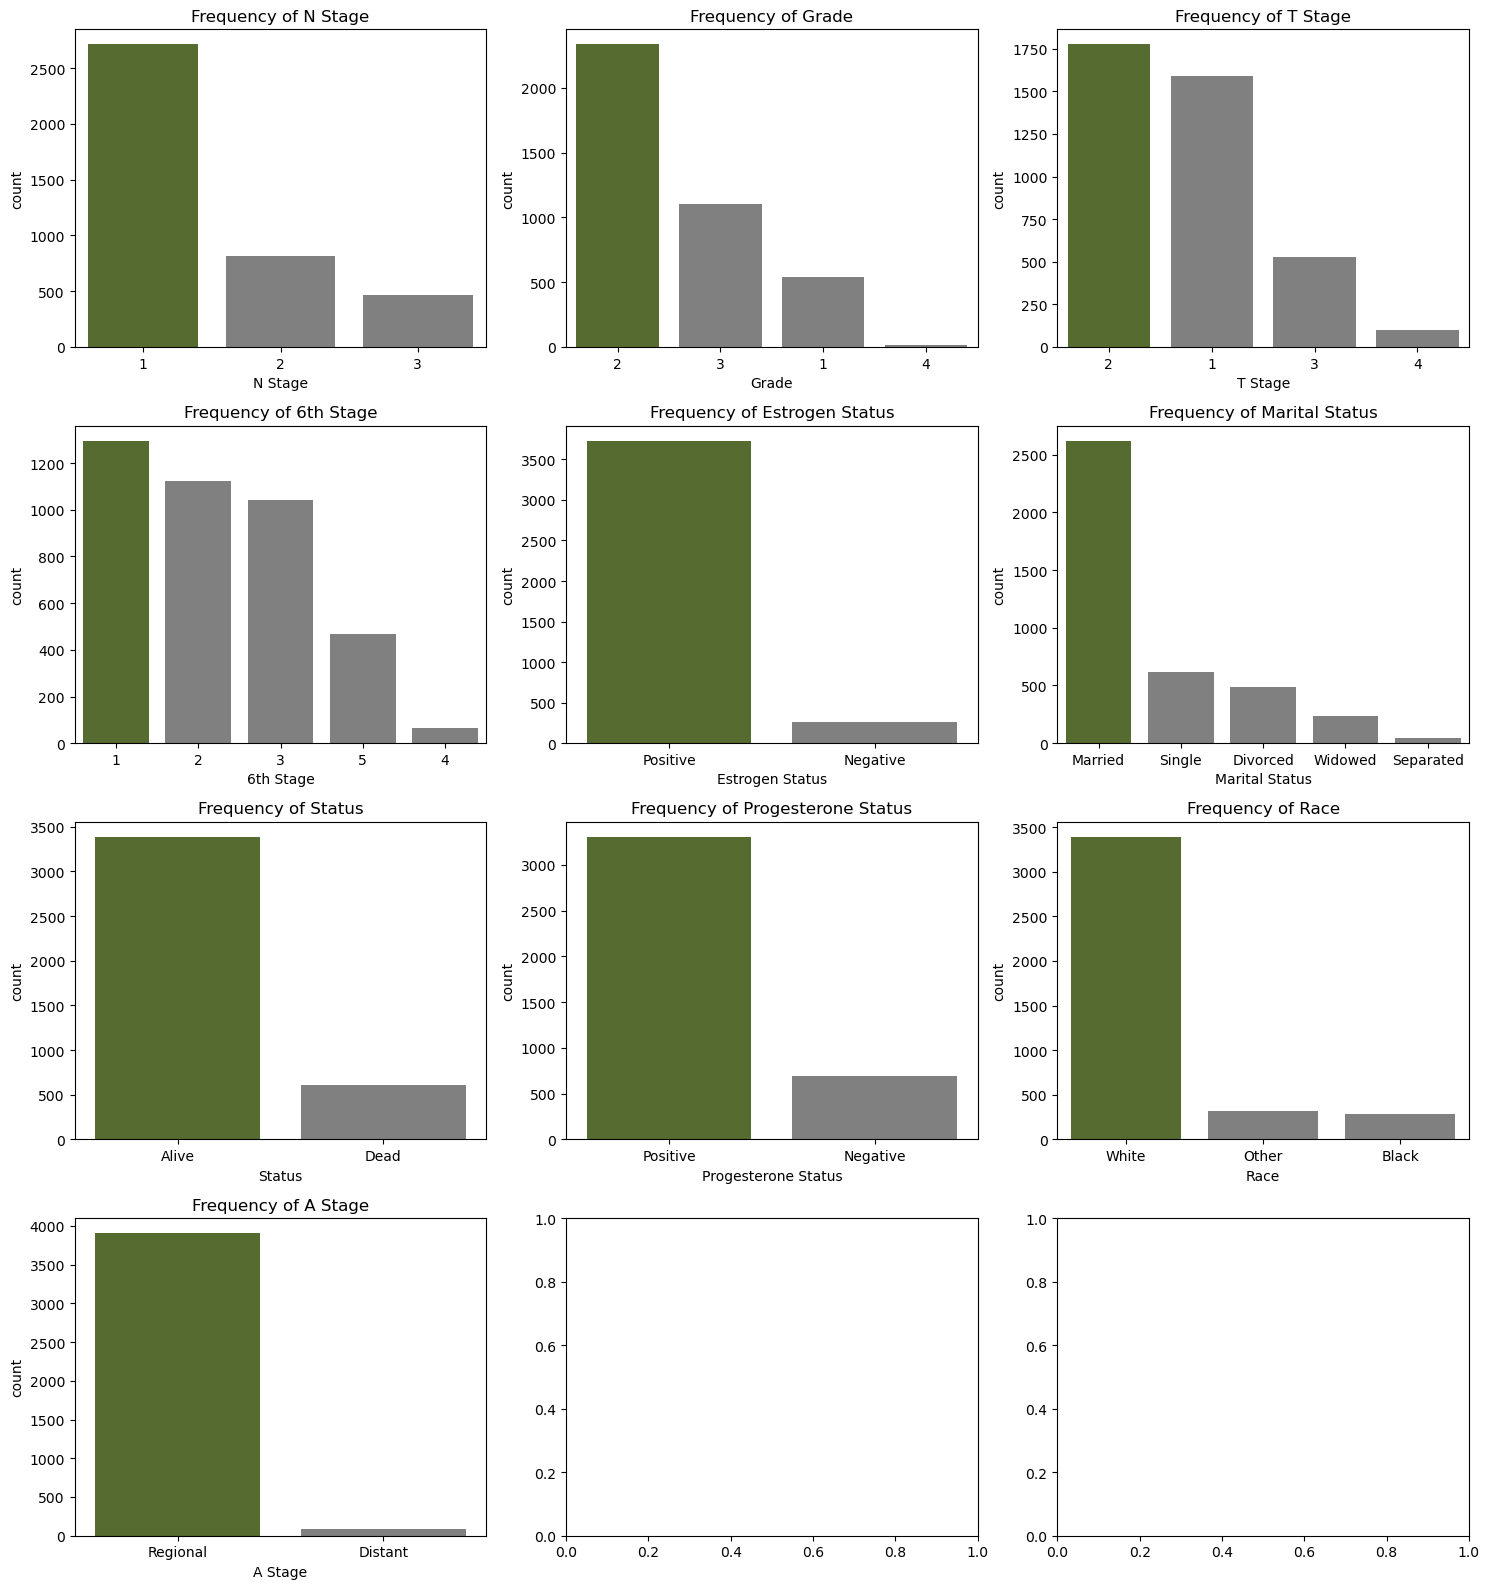

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify variable types in df_clean
num_vars = df_clean.select_dtypes(include=['int64', 'float64']).columns
cat_vars = df_clean.select_dtypes(include=['object', 'category']).columns

# Differentiate between continuous and non-continuous numeric variables
num_continuous = [col for col in num_vars if df_clean[col].nunique() > 15]  # Considered continuous if it has many unique values
non_continuous = list(set(num_vars) - set(num_continuous))

# Differentiate between nominal, ordinal, and binary categorical variables
ordinal_vars = [col for col in cat_vars if hasattr(df_clean[col].dtype, 'ordered') and df_clean[col].dtype.ordered]
nominal_vars = list(set(cat_vars) - set(ordinal_vars))
binary_vars = [col for col in nominal_vars if df_clean[col].nunique() == 2]  # Binary variables

# Group everything that is not continuous (discrete, nominal, ordinal, and binary)
non_continuous_vars = non_continuous + ordinal_vars + nominal_vars

# Function to get only the first word of categories or names
def first_word(categories):
    return [str(cat).split()[0] for cat in categories]

# Set up dynamic subplots
def create_subplots(var_list, num_cols=3, height=4):
    num_rows = -(-len(var_list) // num_cols)  # Round up
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * height))
    axes = axes.flatten() if len(var_list) > 1 else [axes]
    return fig, axes

# Continuous variables - Histograms
if num_continuous:
    fig, axes = create_subplots(num_continuous)
    for i, col in enumerate(num_continuous):
        sns.histplot(df_clean[col], bins=30, kde=True, ax=axes[i], color='gray')
        axes[i].set_title(f"Distribution of {col}")  # Use the full variable name
    plt.tight_layout()
    plt.show()

# Non-continuous variables - Bar plots
if non_continuous_vars:
    fig, axes = create_subplots(non_continuous_vars)
    for i, col in enumerate(non_continuous_vars):
        # Get frequencies and highlight the maximum
        value_counts = df_clean[col].value_counts()
        max_value = value_counts.idxmax()  # Category with the highest frequency
        
        sns.countplot(x=df_clean[col], ax=axes[i], order=value_counts.index)
        # Highlight the category with the highest frequency
        for patch, label in zip(axes[i].patches, value_counts.index):
            if label == max_value:
                patch.set_facecolor('#556B2F')  # Highlight in green
            else:
                patch.set_facecolor('gray')  # Color in grat
        
        # Modify the X-axis labels to show only the first word of the category
        labels = first_word(value_counts.index)
        axes[i].set_xticks(range(len(labels)))
        axes[i].set_xticklabels(labels)  # Change X-axis labels
        axes[i].set_title(f"Frequency of {col}")  # Use the full variable name
    plt.tight_layout()
    plt.show()

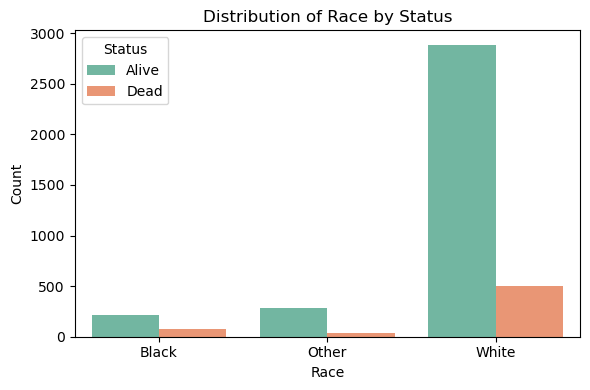

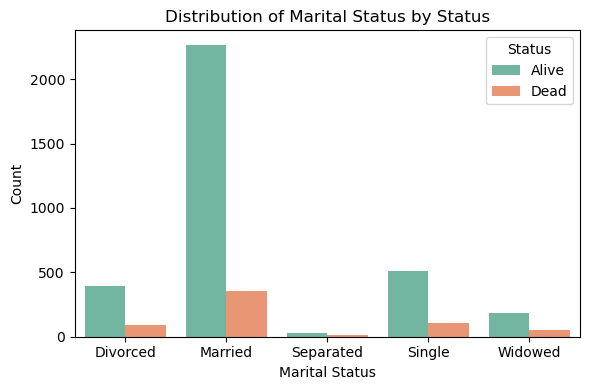

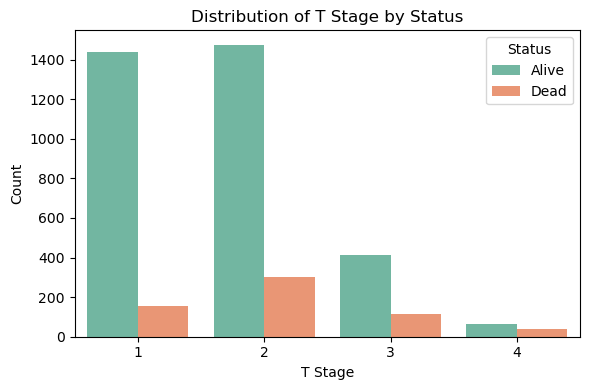

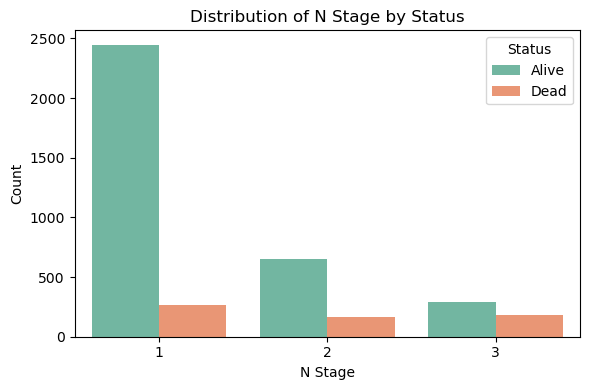

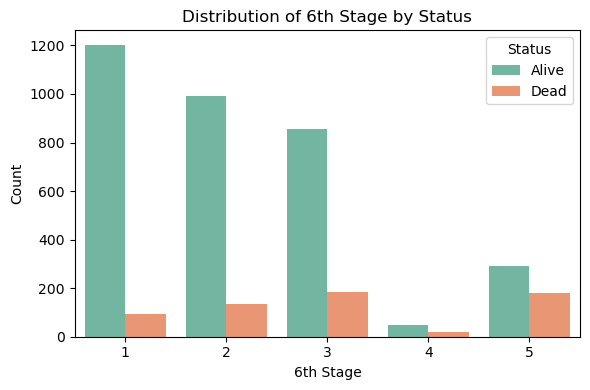

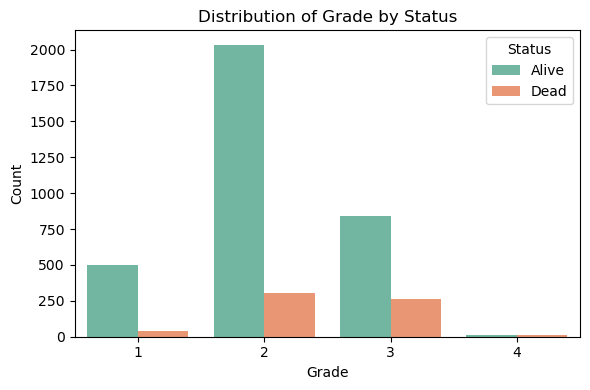

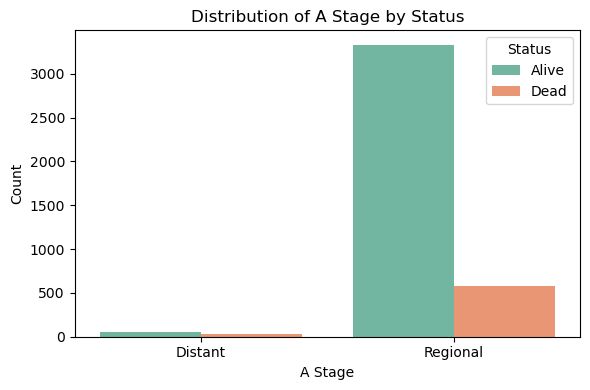

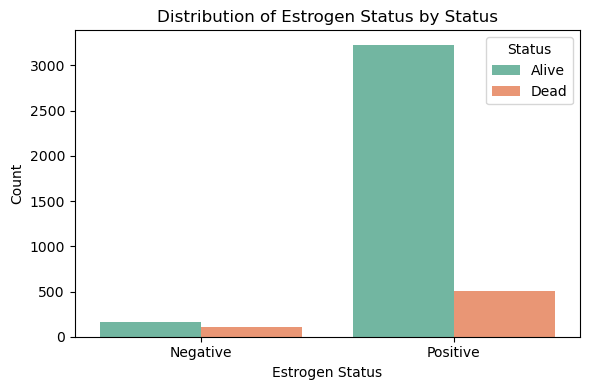

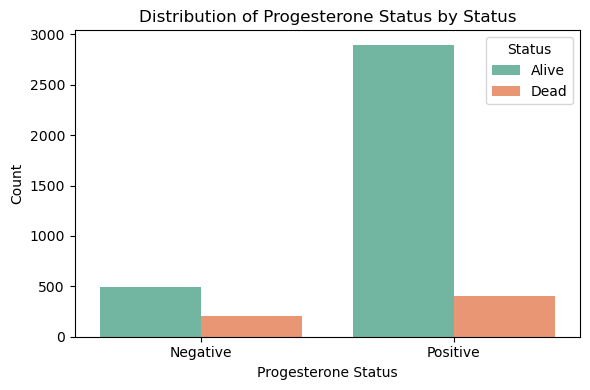

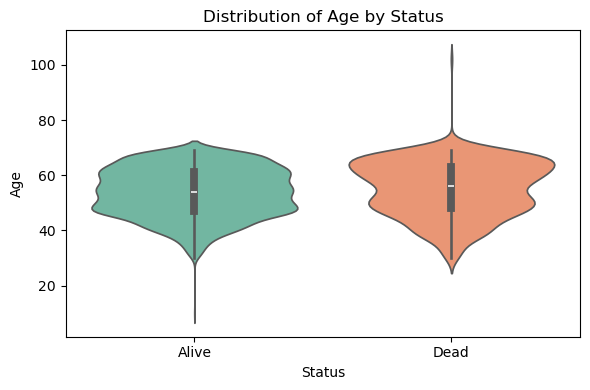

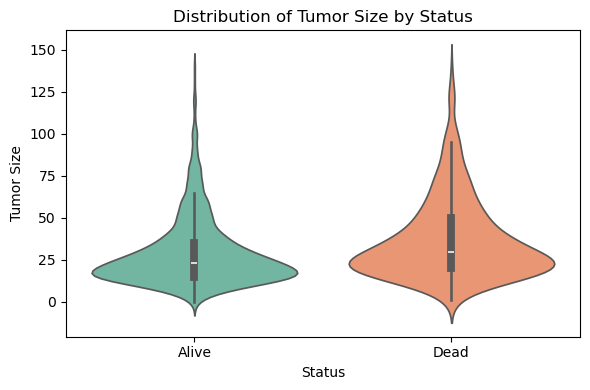

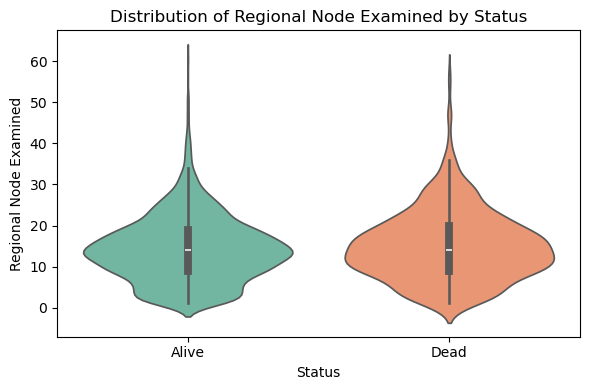

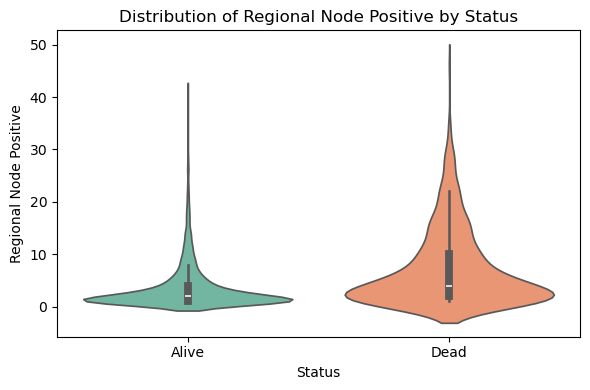

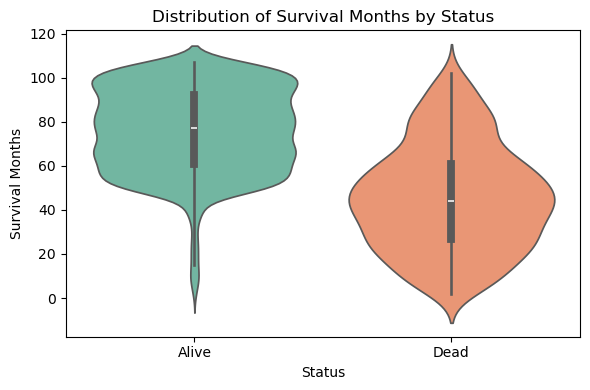

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get only the first word of categories or names
def first_word(categories):
    return [str(cat).split()[0] for cat in categories]

# Categorical variables - Bar plots by Status
categorical_vars = ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

for col in categorical_vars:
    # Create a figure for each variable
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot the countplot for 'Status' by each category (use 'hue' for 'Status' and 'x' for the categories)
    sns.countplot(x=df_clean[col], hue=df_clean['Status'], ax=ax, palette='Set2', order=sorted(df_clean[col].unique()))  # Ensuring ordered categories
    
    # Modify the X-axis labels to show only the first word of the category
    labels = first_word(sorted(df_clean[col].unique()))  # Sort to ensure they are in order 1, 2, 3...
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)  # Change X-axis labels to show only the first word of each category
    
    # Set the title and labels
    ax.set_title(f"Distribution of {col} by Status")  # Complete name for the title
    ax.set_xlabel(col)  # Full variable name for the x-axis label
    ax.set_ylabel("Count")
    
    plt.tight_layout()
    plt.show()


# Numerical variables - Violin plots by Status
numerical_vars = ["Age", "Tumor Size", "Regional Node Examined", "Regional Node Positive", "Survival Months"]

for col in numerical_vars:
    # Create a figure for each numerical variable
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot the violin plot for 'Status' by each numerical variable
    sns.violinplot(x='Status', y=df_clean[col], hue='Status', ax=ax, data=df_clean, palette='Set2')
    
    # Set the title and labels (Only show the first word of the label)
    ax.set_title(f"Distribution of {col} by Status")  # Complete name for the title
    ax.set_xlabel('Status')  # Full name for the x-axis label
    ax.set_ylabel(col)  # Full name for the y-axis label
    
    plt.tight_layout()
    plt.show()

https://seaborn.pydata.org/generated/seaborn.histplot.html

### Unbalanced data set
Following Lemaître et al. (2017), we applied two resampling strategies: SMOTE to synthetically generate new minority class samples, and ADASYN (He et al., 2008) to adaptively focus on difficult-to-learn instances of the minority class.

#### Percentage of imbalance

In [48]:
# Count the values in the 'Status_Dead' column
status_count = df_clean_dummies['Status_Dead'].count()

# Sum the values in the 'Status_Dead' column (1 represents dead)
status_sum = df_clean_dummies['Status_Dead'].sum()

# Calculate the number of alive
status_alive = status_count - status_sum

# Calculate percentages
percentage_alive = (status_alive / status_count) 
percentage_dead = (status_sum / status_count) 

# Print results
print(f"Alive: {status_alive} ({percentage_alive:.2f})")
print(f"Dead: {status_sum} ({percentage_dead:.2f})")

Alive: 3386 (0.85)
Dead: 611 (0.15)


#### Status back to original values

In [50]:
# Select the nominal categorical columns
nominal_columns = [
    "Race", 
    "Marital Status",   
    "Estrogen Status", 
    "Progesterone Status", 
    "A Stage"
]

# Apply get_dummies to all columns except 'Status', then add 'Status' back
df_clean_dummies = pd.get_dummies(df_clean.drop('Status', axis=1), columns=nominal_columns, drop_first=True)
df_clean_dummies['Status'] = df_clean['Status']


# Verify the result
df_clean_dummies.head(2)

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,Estrogen Status_Positive,Progesterone Status_Positive,A Stage_Regional,Status
0,10,1,1,1,2,9,16,1,69,False,True,True,False,False,False,True,True,True,Alive
1,30,2,2,3,2,28,19,7,74,False,True,False,False,True,False,True,True,True,Alive


#### Training - Validation - Testing

"Typically, we assign 2/3 to the training set and 1/3 of the data to the test set. Other common training/test splits are 60/40, 70/30, or 80/20– or even 90/10 if the dataset is relatively large" (Raschka, 2018, p. 8).

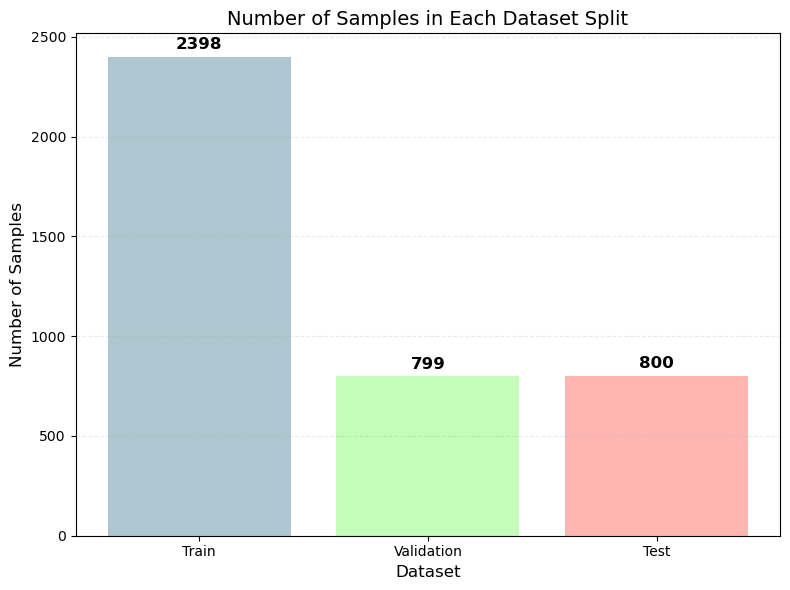

In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Separate predictors and target variable
X = df_clean_dummies.drop('Status', axis=1)
y = df_clean_dummies['Status']

# Split data into training (60%) and temp (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split temp set into validation (20%) and test (20%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Count the number of samples in each set
set_sizes = {
    'Train': len(X_train),
    'Validation': len(X_valid),
    'Test': len(X_test)
}

# Set a larger figure size
plt.figure(figsize=(8, 6))

# Define pastel colors
pastel_colors = ['#AEC6CF', '#C3FDB8', '#FFB6B3']  # light blue, light green, light coral/pink

# Plot the number of samples in each set
plt.bar(set_sizes.keys(), set_sizes.values(), color=pastel_colors)

# Add value labels on top of each bar
for i, (key, value) in enumerate(set_sizes.items()):
    plt.text(i, value + max(set_sizes.values()) * 0.01, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Number of Samples in Each Dataset Split', fontsize=14)
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.25)
plt.tight_layout()
plt.show()

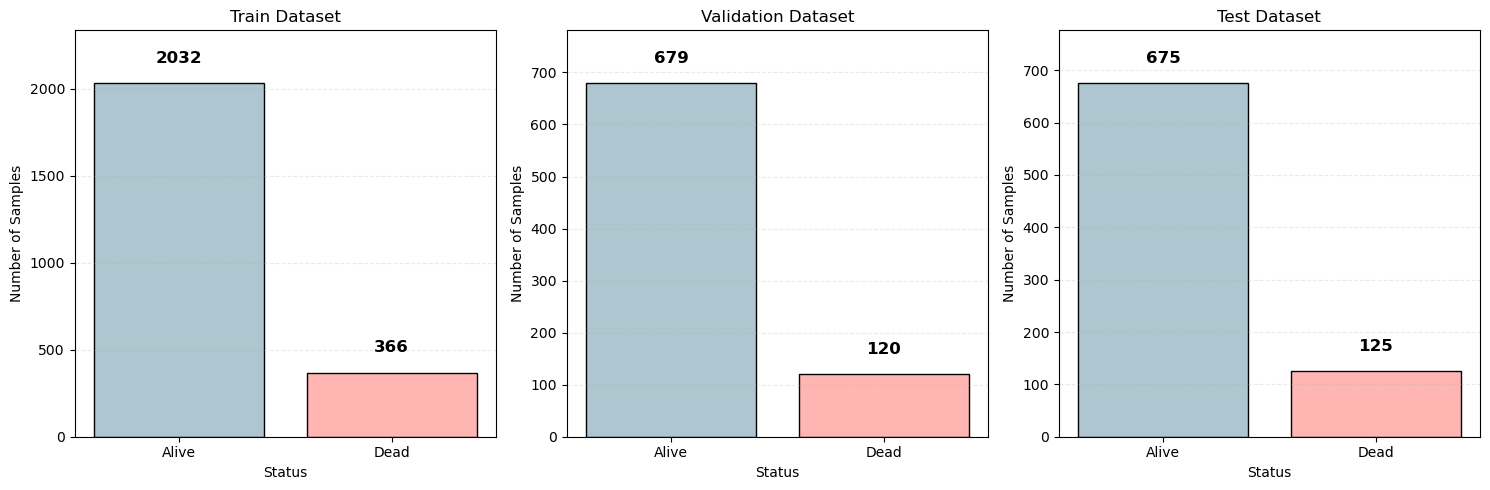

In [54]:
import matplotlib.pyplot as plt

# Set a larger figure size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define pastel colors for the bars
alive_color = '#AEC6CF'  # light blue for Alive
dead_color = '#FFB6B3'   # light coral for Dead

# Function to plot histograms with counts on top of bars
def plot_histogram(ax, data, title):
    counts_alive = (data == 'Alive').sum()
    counts_dead = (data == 'Dead').sum()
    
    # Plotting Alive and Dead counts as bars
    bars = ax.bar(['Alive', 'Dead'], [counts_alive, counts_dead], color=[alive_color, dead_color], edgecolor='black')
    
    # Add counts on top of each bar, with dynamic adjustment for positioning
    max_count = max(counts_alive, counts_dead)
    
    for i, bar in enumerate(bars):
        # Get the height of the bar for positioning the text
        yval = bar.get_height()
        
        # Add the count text above the bars
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * max_count, str(int(yval)),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Set title, labels and grid
    ax.set_title(title)
    ax.set_xlabel('Status')
    ax.set_ylabel('Number of Samples')
    ax.grid(axis='y', linestyle='--', alpha=0.25)

    # Adjust y-limits to ensure text fits within the plot
    ax.set_ylim(0, max_count + 0.15 * max_count)

# Plot histograms for each dataset
plot_histogram(axs[0], y_train, 'Train Dataset')
plot_histogram(axs[1], y_valid, 'Validation Dataset')
plot_histogram(axs[2], y_test, 'Test Dataset')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Machine Learning

#### SMOTE and ADASYN

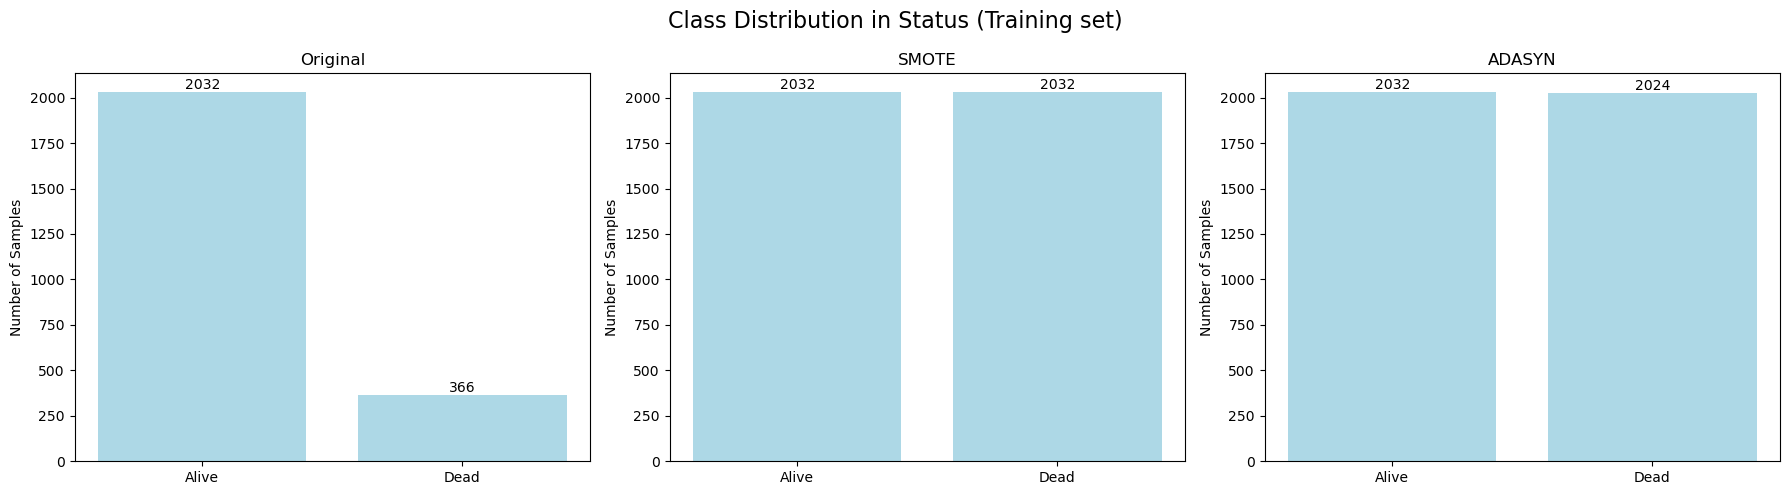

In [57]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Count instances per class (using Counter to automatically detect the categories)
counter_original = Counter(y_train)
counter_smote = Counter(y_train_smote)
counter_adasyn = Counter(y_train_adasyn)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Class Distribution in Status (Training set)', fontsize=16)

# Function to plot the distributions and show the sizes on the bars
def plot_class_distribution(ax, counter, title):
    bars = ax.bar(counter.keys(), counter.values(), color='lightblue')
    ax.set_title(title)
    ax.set_xticks(list(counter.keys()))
    ax.set_xticklabels([str(k) for k in counter.keys()])
    ax.set_ylabel('Number of Samples')

    # Add sizes on top of the bars
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                str(int(bar.get_height())), ha='center', va='bottom')

# Original plot
plot_class_distribution(axes[0], counter_original, 'Original')

# SMOTE plot
plot_class_distribution(axes[1], counter_smote, 'SMOTE')

# ADASYN plot
plot_class_distribution(axes[2], counter_adasyn, 'ADASYN')

plt.tight_layout()
plt.show()

#### Logistic Regression

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html

#### Hipótesis (t pareada)
Se aplica la sguiente prueba de hipótesis para cada una de las comparaciones que deseamos hacer:

Ho: $\mu = 0$

Ha: $\mu \neq 0$

In [61]:
# Import required libraries and modules
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from scipy.stats import shapiro, ttest_rel, wilcoxon
import numpy as np

# Logistic regression
model = LogisticRegression(penalty=None, solver='newton-cg',random_state=42)

# Cross-validation strategy: 10-fold CV repeated 3 times
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define pipelines with different oversampling and scaling strategies
pipelines = {
    'SMOTE': Pipeline([
        ('smote', SMOTE(random_state=42)),  # SMOTE without scaling
        ('model', model)
    ]),
    'ADASYN': Pipeline([
        ('adasyn', ADASYN(random_state=42)),  # ADASYN without scaling
        ('model', model)
    ]),
    'SMOTE_scaled': Pipeline([
        ('smote', SMOTE(random_state=42)),   # SMOTE with feature scaling
        ('scaler', StandardScaler()),
        ('model', model)
    ]),
    'ADASYN_scaled': Pipeline([
        ('adasyn', ADASYN(random_state=42)),  # ADASYN with feature scaling
        ('scaler', StandardScaler()),
        ('model', model)
    ])
}

# Evaluate all pipelines using cross-validation with ROC AUC as the metric
results = {}
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    results[name] = scores
    print(f'{name} ROC AUC: Mean={scores.mean():.3f}, Std={scores.std():.3f}')

# Define function to statistically compare performance between two pipelines
def compare_and_print(name1, name2):
    print(f"\nComparing {name1} vs {name2}")
    stat1, p1 = shapiro(results[name1])  # Normality test for first pipeline
    stat2, p2 = shapiro(results[name2])  # Normality test for second pipeline
    if p1 > 0.05 and p2 > 0.05:
        # If both are normally distributed, use paired t-test
        t_stat, p_value = ttest_rel(results[name1], results[name2])
        test_name = "Paired t-test"
    else:
        # Otherwise, use non-parametric Wilcoxon test
        t_stat, p_value = wilcoxon(results[name1], results[name2])
        test_name = "Wilcoxon test"
    print(f"{test_name} p = {p_value:.4f}")
    if p_value < 0.05:
        # Statistically significant difference found
        better = name1 if results[name1].mean() > results[name2].mean() else name2
        print(f"→ Statistically significant: {better} performed better.")
    else:
        # No significant difference
        print("→ No statistically significant difference.")

# Run pairwise comparisons
compare_and_print('SMOTE', 'ADASYN')
compare_and_print('SMOTE_scaled', 'ADASYN_scaled')
compare_and_print('SMOTE', 'SMOTE_scaled')
compare_and_print('ADASYN', 'ADASYN_scaled')

SMOTE ROC AUC: Mean=0.826, Std=0.043
ADASYN ROC AUC: Mean=0.812, Std=0.044
SMOTE_scaled ROC AUC: Mean=0.826, Std=0.043
ADASYN_scaled ROC AUC: Mean=0.811, Std=0.044

Comparing SMOTE vs ADASYN
Paired t-test p = 0.0000
→ Statistically significant: SMOTE performed better.

Comparing SMOTE_scaled vs ADASYN_scaled
Paired t-test p = 0.0000
→ Statistically significant: SMOTE_scaled performed better.

Comparing SMOTE vs SMOTE_scaled
Paired t-test p = 0.8139
→ No statistically significant difference.

Comparing ADASYN vs ADASYN_scaled
Paired t-test p = 0.1749
→ No statistically significant difference.


##### ROC AUC (Cerda & Cifuentes, 2011).)
- Evaluates model performance across all possible thresholds.

- Helps identify the optimal threshold (maximum sensitivity + specificity) for each cutoff point.

- AUC summarizes the model’s discriminative ability (0.5 = random, 1 = perfect).

- Relevant both statistically and clinically 



###### How does it work?

- Sensitivity (TPR) and 1 - Specificity (FPR) are calculated for multiple thresholds.

- The ROC curve is plotted: X-axis = FPR, Y-axis = TPR.

- Each point represents model performance at a specific threshold.

- The Area Under the Curve (AUC) is computed through numerical integration.

- AUC ≈ probability that the model assigns a higher score to a positive case than to a negative one.

In [63]:
import pandas as pd

# Create a summary DataFrame with mean and std of ROC AUC for each pipeline
summary_df = pd.DataFrame({
    'Pipeline': list(results.keys()),
    'Mean ROC AUC': [scores.mean() for scores in results.values()],
    'Std ROC AUC': [scores.std() for scores in results.values()]
}).sort_values(by='Mean ROC AUC', ascending=False).reset_index(drop=True)

print("\n *Summary of ROC AUC results:")
summary_df


 *Summary of ROC AUC results:


,Pipeline,Mean ROC AUC,Std ROC AUC
0,SMOTE_scaled,0.825954,0.042559
1,SMOTE,0.825949,0.042551
2,ADASYN,0.811514,0.043627
3,ADASYN_scaled,0.811460,0.043604


Statistically, no significant difference is observed when standardization is applied in either case. However, regardless of whether scaling is used or not, the SMOTE model consistently outperforms ADASYN in terms of AUC score. Therefore, SMOTE is chosen as the preferred oversampling technique.

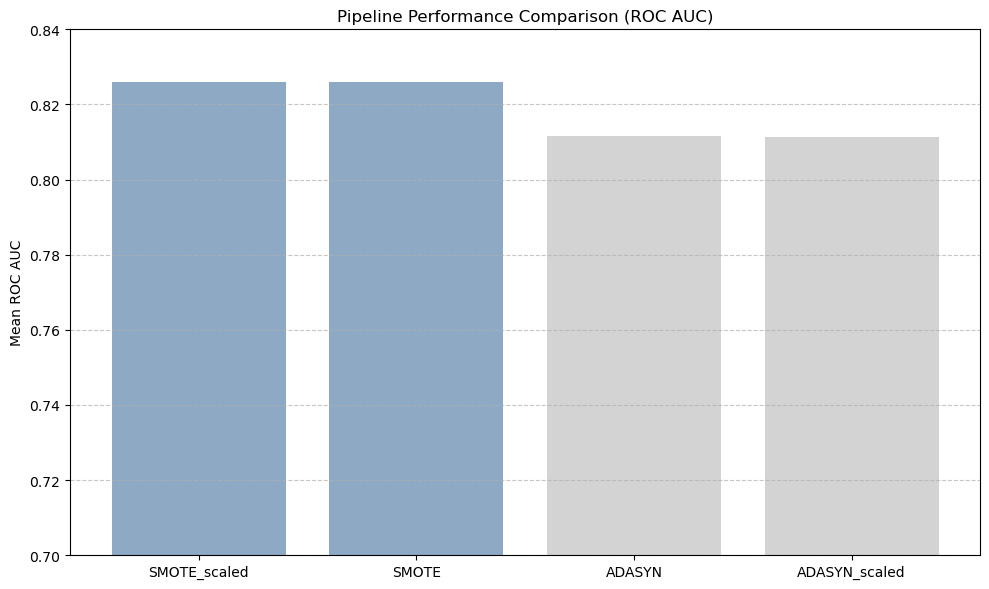

In [65]:
import matplotlib.pyplot as plt

# AUC data (without error bars)
pipelines = ['SMOTE_scaled', 'SMOTE', 'ADASYN', 'ADASYN_scaled']
mean_auc = [0.825954, 0.825949, 0.811514, 0.811460]

# Define custom colors
highlight_color = '#8da9c4'  # Soft bluish gray
default_color = '#d3d3d3'    # Light gray

# Create bar chart without error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(pipelines, mean_auc, color=[highlight_color, highlight_color, default_color, default_color])

plt.ylabel('Mean ROC AUC')
plt.title('Pipeline Performance Comparison (ROC AUC)')
plt.ylim(0.7, 0.84)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Random Forests
https://www.datacamp.com/tutorial/random-forests-classifier-python

In [67]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [68]:
df_clean_dummies['Status'] = df_clean_dummies['Status'].map({'Alive':0,'Dead':1})

# Separate predictors and target variable
X = df_clean_dummies.drop('Status', axis=1)
y = df_clean_dummies['Status']

# Split data into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Initialize RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87875


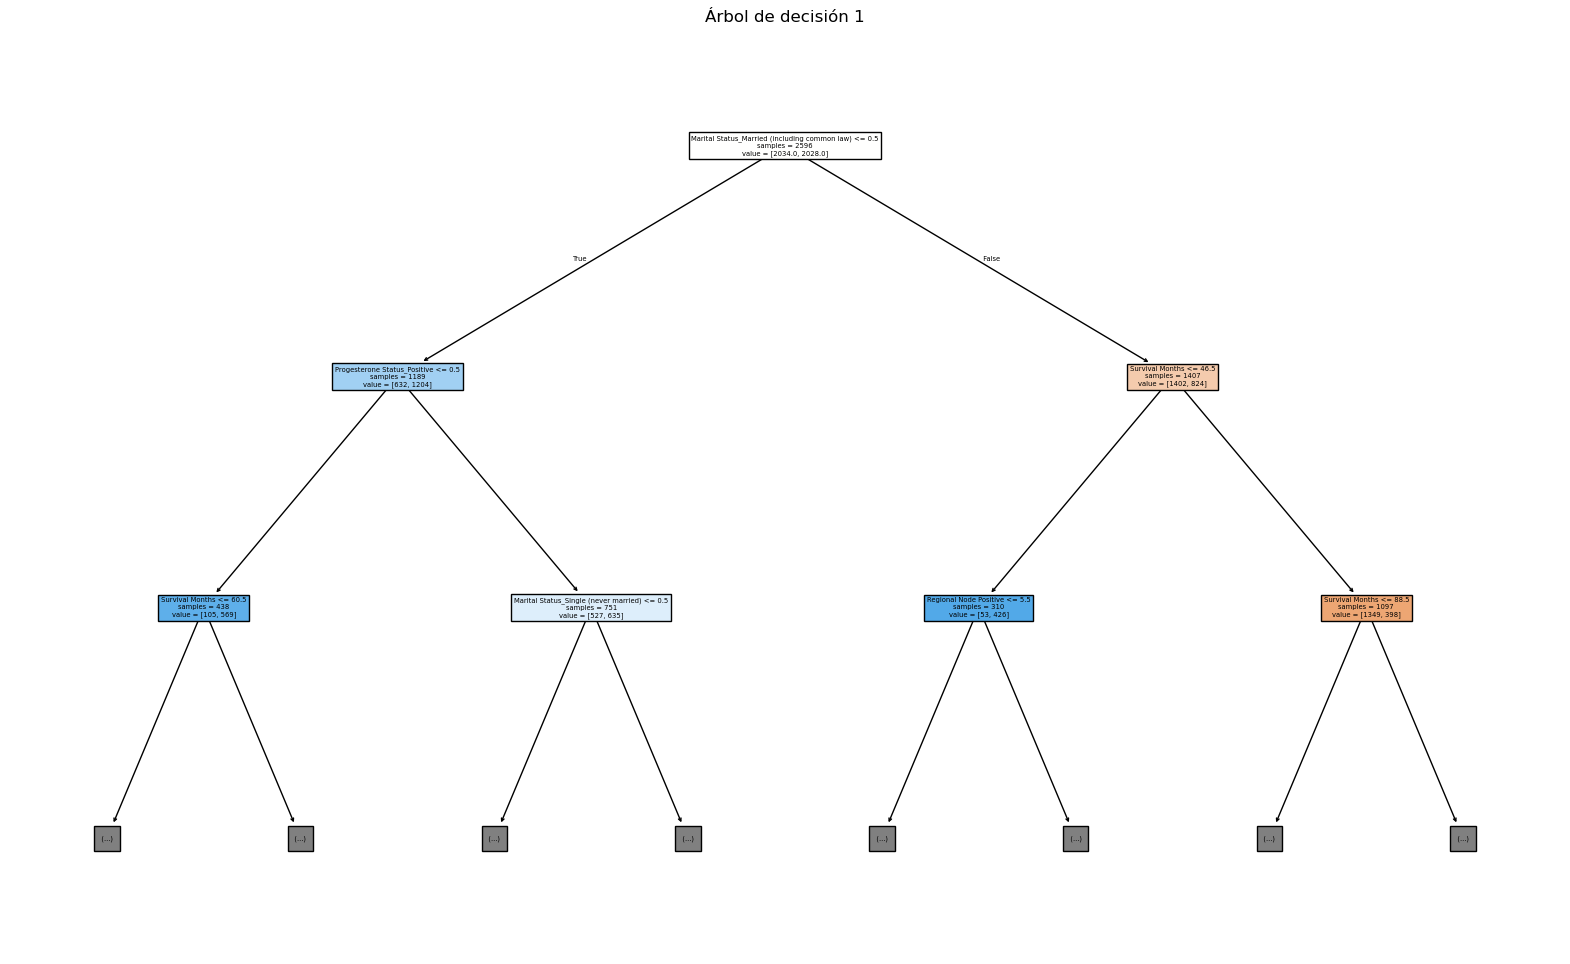

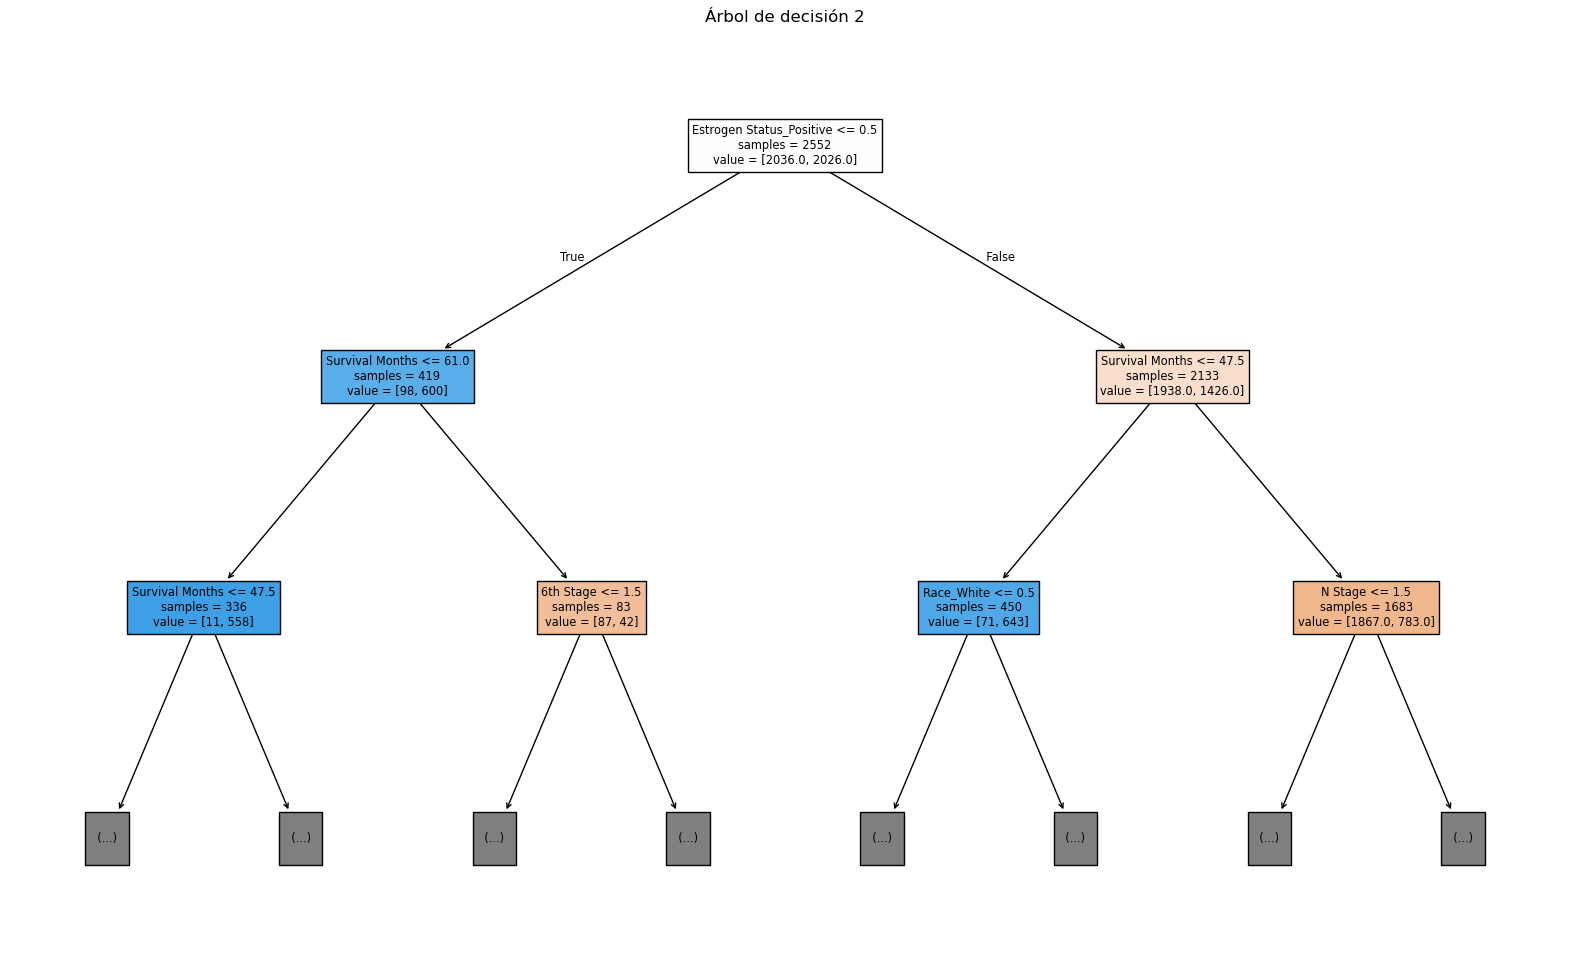

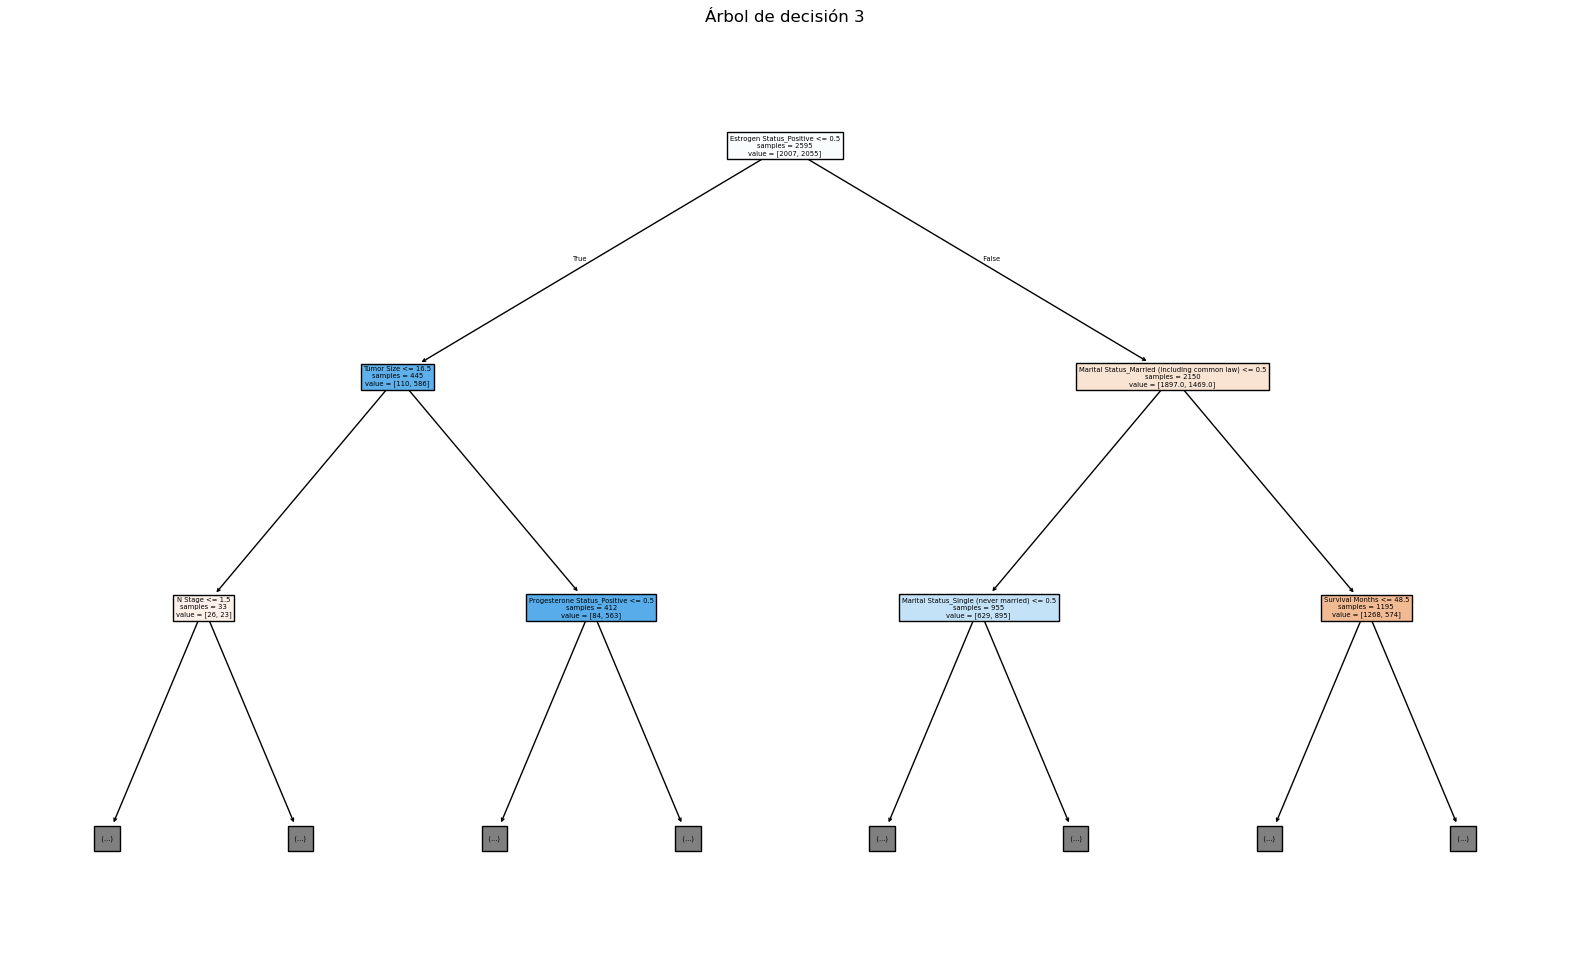

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Exportar los primeros tres árboles de decisión del bosque
for i in range(3):
    tree = rf.estimators_[i]
    
    plt.figure(figsize=(20, 12))
    plot_tree(tree,
              feature_names=X_train.columns,
              filled=True,
              max_depth=2,
              impurity=False)
    plt.title(f'Árbol de decisión {i + 1}')
    plt.show()

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Parameters to optimize
param_dist = {
    'max_depth': randint(1, 20),  # Depth of the tree to control complexity and prevent overfitting.
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node.
    'max_features': uniform(0.1, 0.9),  # Number of features drawn randomly for each split (as a fraction).
    'max_samples': uniform(0.5, 0.5),  # Fraction of samples to be drawn
}

# Fixed parameters (not optimized)
param_fixed = {
    'n_estimators': 500,  # Standard recommended value for the number of trees.
    'criterion': 'gini',  # Default criterion based on Gini impurity.
    'random_state': 42,  # Fixed value for reproducibility.
    'n_jobs': -1  # Parallel training for computational efficiency.
}

# Create the Random Forest classifier with fixed parameters
rf = RandomForestClassifier(**param_fixed)

# Use RandomizedSearchCV to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,  
                                 cv=5)  # Using 5-fold cross-validation.
                                 
# Fit the RandomizedSearchCV to the data
rand_search.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=500, n_jobs=-1,
                                                    random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F873413800>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F86DF451C0>,
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F872DA50A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F872DA6930>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F86E384380>})

In [71]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Best hyperparameters: {'max_depth': 17, 'max_features': 0.2490661949177422, 'max_samples': 0.6977220783097694, 'min_samples_leaf': 6, 'min_samples_split': 19}

Training Set Metrics:
Accuracy: 0.9241752831117676
Sensitivity: 0.9118660758247169
Specificity: 0.9364844903988183
Precision: 0.9348813730439172
AUC: 0.9786143432628818
Confusion Matrix:
 [[1902  129]
 [ 179 1852]]

Validation Set Metrics:
Accuracy: 0.8785982478097623
Sensitivity: 0.6639344262295082
Specificity: 0.9172821270310192
Precision: 0.5912408759124088
AUC: 0.8419982081022834
Confusion Matrix:
 [[621  56]
 [ 41  81]]

Test Set Metrics:
Accuracy: 0.87
Sensitivity: 0.6639344262295082
Specificity: 0.9070796460176991
Precision: 0.5625
AUC: 0.8673412640843369
Confusion Matrix:
 [[615  63]
 [ 41  81]]


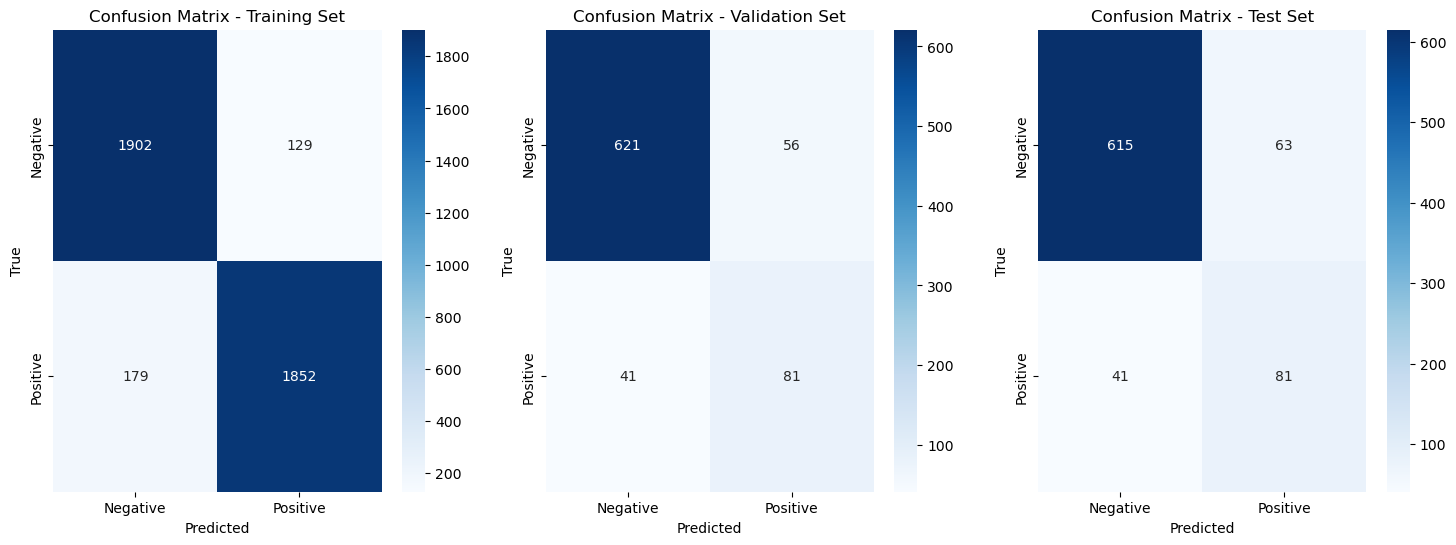

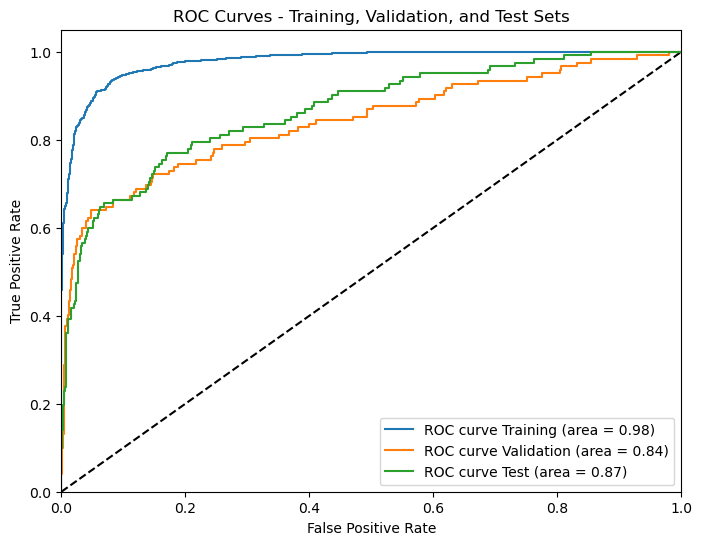


Summary of Evaluation Metrics:
      Dataset  Accuracy  Sensitivity  Specificity  Precision       AUC
0    Training  0.924175     0.911866     0.936484   0.934881  0.978614
1  Validation  0.878598     0.663934     0.917282   0.591241  0.841998
2        Test  0.870000     0.663934     0.907080   0.562500  0.867341


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import pandas as pd

# Function to evaluate the model on train, validation, and test sets
def evaluate_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test):
    sets = {'Training': (X_train, y_train), 'Validation': (X_valid, y_valid), 'Test': (X_test, y_test)}
    
    # Initialize lists to store metrics for each set
    metrics_data = []
    
    # Create a figure for the confusion matrices (1 row, 3 columns)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
    
    # Create a figure for the ROC curve (separate graph)
    plt.figure(figsize=(8, 6))
    
    # Iterate over the sets and compute metrics and plot confusion matrices and ROC curves
    for idx, (name, (X_set, y_set)) in enumerate(sets.items()):
        y_pred = model.predict(X_set)
        tn, fp, fn, tp = confusion_matrix(y_set, y_pred).ravel()
        specificity = tn / (tn + fp)
        
        # Compute metrics
        accuracy = accuracy_score(y_set, y_pred)
        sensitivity = recall_score(y_set, y_pred)
        precision = precision_score(y_set, y_pred)
        auc = roc_auc_score(y_set, model.predict_proba(X_set)[:, 1])
        
        # Store metrics in the list
        metrics_data.append({
            'Dataset': name,
            'Accuracy': accuracy,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Precision': precision,
            'AUC': auc
        })
        
        # Print performance metrics
        print(f"\n{name} Set Metrics:")
        print("Accuracy:", accuracy)
        print("Sensitivity:", sensitivity)
        print("Specificity:", specificity)
        print("Precision:", precision)
        print("AUC:", auc)
        print("Confusion Matrix:\n", confusion_matrix(y_set, y_pred))

        # Plot confusion matrix in the corresponding subplot (in a single row, 3 columns)
        cm = confusion_matrix(y_set, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], 
                    yticklabels=["Negative", "Positive"], ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix - {name} Set')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('True')
    
    # Plot the diagonal line for the ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Training, Validation, and Test Sets')
    
    # Plot ROC curves for each set
    for name, (X_set, y_set) in sets.items():
        fpr, tpr, _ = roc_curve(y_set, model.predict_proba(X_set)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve {name} (area = %0.2f)' % roc_auc_score(y_set, model.predict_proba(X_set)[:, 1]))

    plt.legend(loc="lower right")
    plt.show()

    # Create and display summary table of metrics
    metrics_df = pd.DataFrame(metrics_data)
    print("\nSummary of Evaluation Metrics:")
    print(metrics_df)

# Evaluate the model
print('Best hyperparameters:',  rand_search.best_params_)
evaluate_model(best_rf, X_train_sm, y_train_sm, X_valid, y_valid, X_test, y_test)

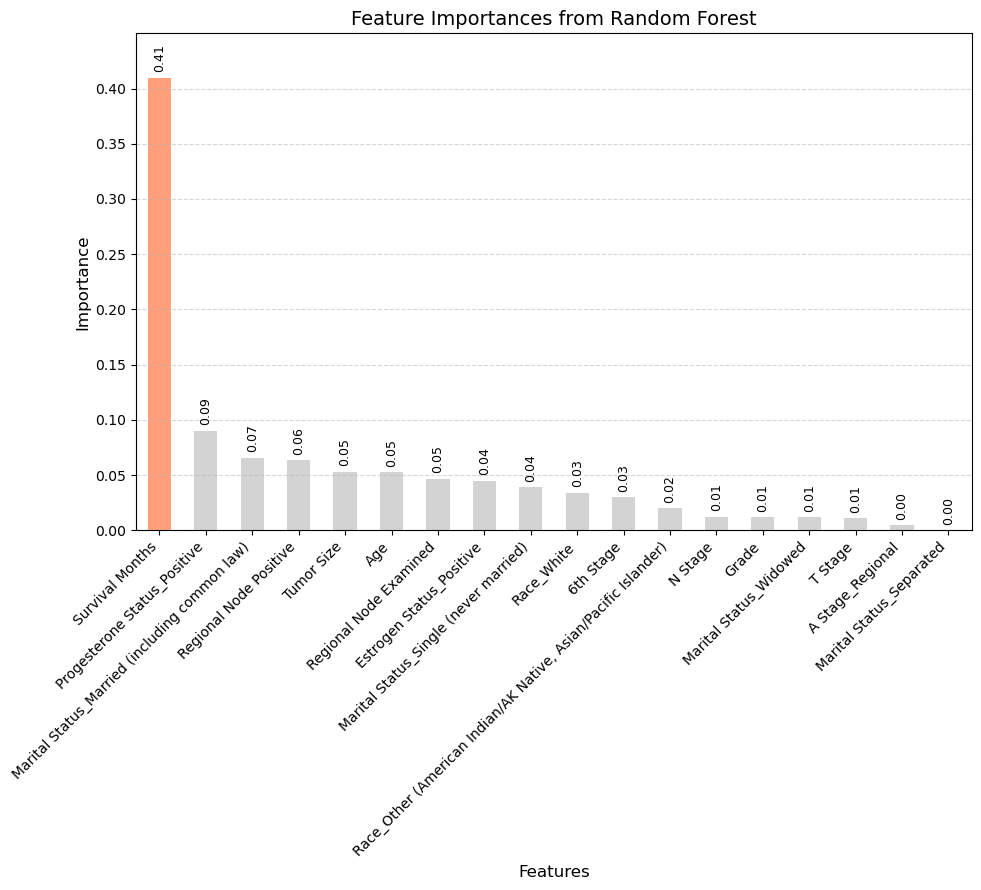

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate feature importances from the trained Random Forest model
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Identify the most important feature
top_feature = feature_importances.idxmax()

# Use pastel colors, highlighting the most important feature
colors = ['lightgray' if feature != top_feature else 'lightsalmon' for feature in feature_importances.index]

# Create the plot
plt.figure(figsize=(10, 9))
feature_importances.plot(kind='bar', color=colors)

# Add values on top of each bar for better visibility
for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', va='bottom', fontsize=9, rotation=90)

# Increase the y-axis limit to make space for the labels above the bars
plt.ylim(0, feature_importances.max() + 0.04)  # Add extra space above the highest bar

# Customize the plot's appearance
plt.title('Feature Importances from Random Forest', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Automatically adjusts layout for better spacing
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

#### Naive Bayes

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Define the model
model = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Apply GridSearchCV to find the best value for var_smoothing
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model with the training set
grid_search.fit(X_train_sm, y_train_sm)

# Get the best model after GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

In [77]:
# Generate predictions with the best model
y_pred = best_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

Best var_smoothing: 1e-05

Training Set Metrics:
Accuracy: 0.7740029542097489
Sensitivity: 0.6986706056129985
Specificity: 0.8493353028064993
Precision: 0.8226086956521739
AUC: 0.8569685870969447
Confusion Matrix:
 [[1725  306]
 [ 612 1419]]

Validation Set Metrics:
Accuracy: 0.8135168961201502
Sensitivity: 0.5819672131147541
Specificity: 0.8552437223042836
Precision: 0.42011834319526625
AUC: 0.8049010824030801
Confusion Matrix:
 [[579  98]
 [ 51  71]]

Test Set Metrics:
Accuracy: 0.82625
Sensitivity: 0.5983606557377049
Specificity: 0.8672566371681416
Precision: 0.44785276073619634
AUC: 0.7759925528313748
Confusion Matrix:
 [[588  90]
 [ 49  73]]


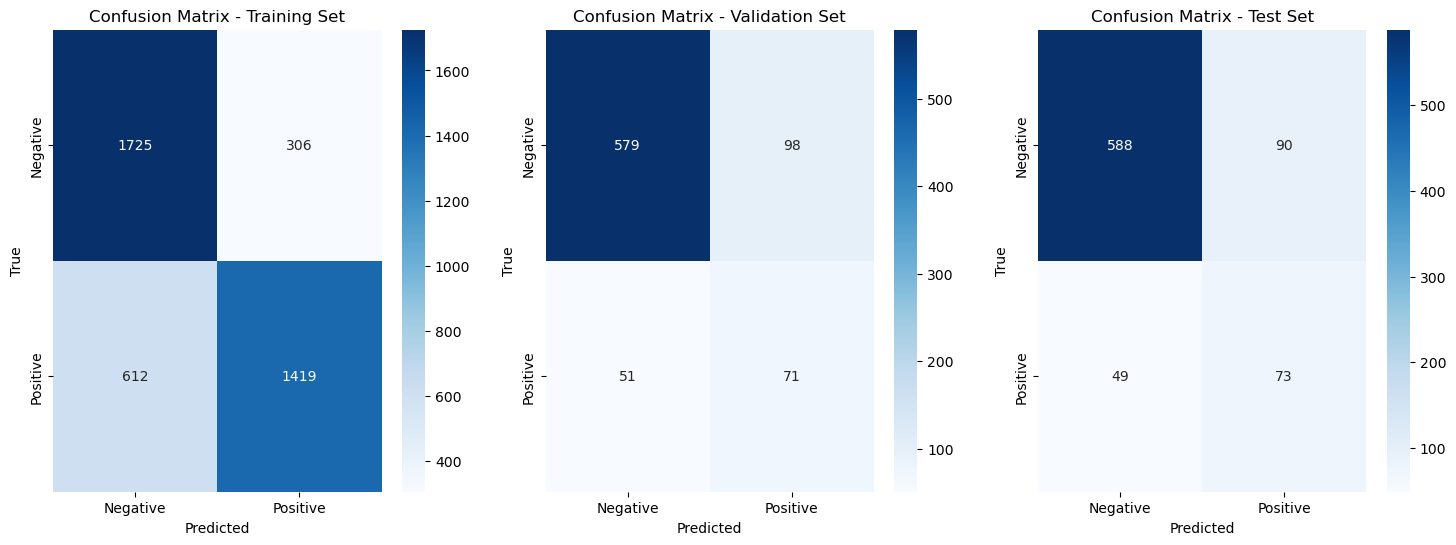

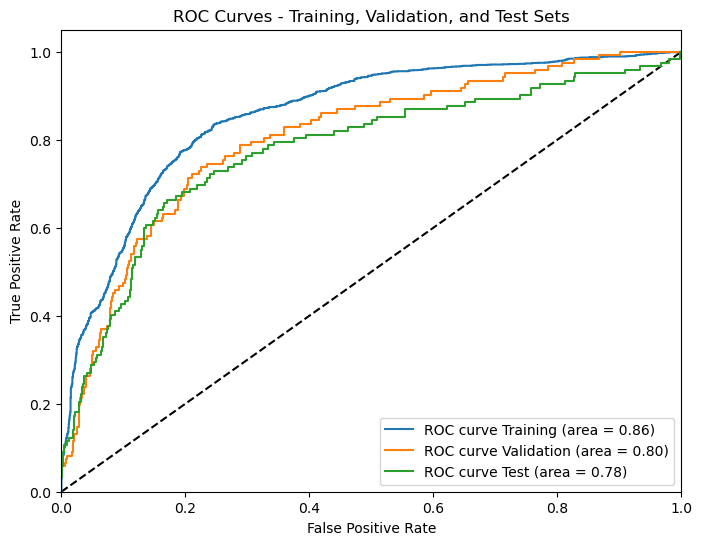


Summary of Evaluation Metrics:
      Dataset  Accuracy  Sensitivity  Specificity  Precision       AUC
0    Training  0.774003     0.698671     0.849335   0.822609  0.856969
1  Validation  0.813517     0.581967     0.855244   0.420118  0.804901
2        Test  0.826250     0.598361     0.867257   0.447853  0.775993


In [78]:
# Evaluate the model
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")
evaluate_model(best_model, X_train_sm, y_train_sm, X_valid, y_valid, X_test, y_test)

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

#### Logistic regression (regularized)
We used regularized logistic regression with the saga solver, chosen for its support of L1, L2, and elastic-net penalties, and its scalability for large datasets. This approach helps prevent overfitting and enables feature selection. As suggested by Bischl et al. (2023), we optimized the hyperparameters C (inverse regularization strength) on a log scale from 10^-4 to 10^4 and l1_ratio (the mix between L1 and L2 penalties) uniformly over [0, 1]. We employed random search for optimization, which Bischl et al. found more efficient than grid search in high-dimensional spaces.

Best Hyperparameters: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.9191919191919192, 'C': 1.3219411484660315}

Training Set Metrics:
Accuracy: 0.8476120137863121
Sensitivity: 0.8242245199409158
Specificity: 0.8709995076317085
Precision: 0.8646694214876033
AUC: 0.9246717726543353
Confusion Matrix:
 [[1769  262]
 [ 357 1674]]

Validation Set Metrics:
Accuracy: 0.8347934918648311
Sensitivity: 0.6557377049180327
Specificity: 0.8670605612998523
Precision: 0.47058823529411764
AUC: 0.8372278858028428
Confusion Matrix:
 [[587  90]
 [ 42  80]]

Test Set Metrics:
Accuracy: 0.8325
Sensitivity: 0.7049180327868853
Specificity: 0.855457227138643
Precision: 0.4673913043478261
AUC: 0.8318704966391025
Confusion Matrix:
 [[580  98]
 [ 36  86]]


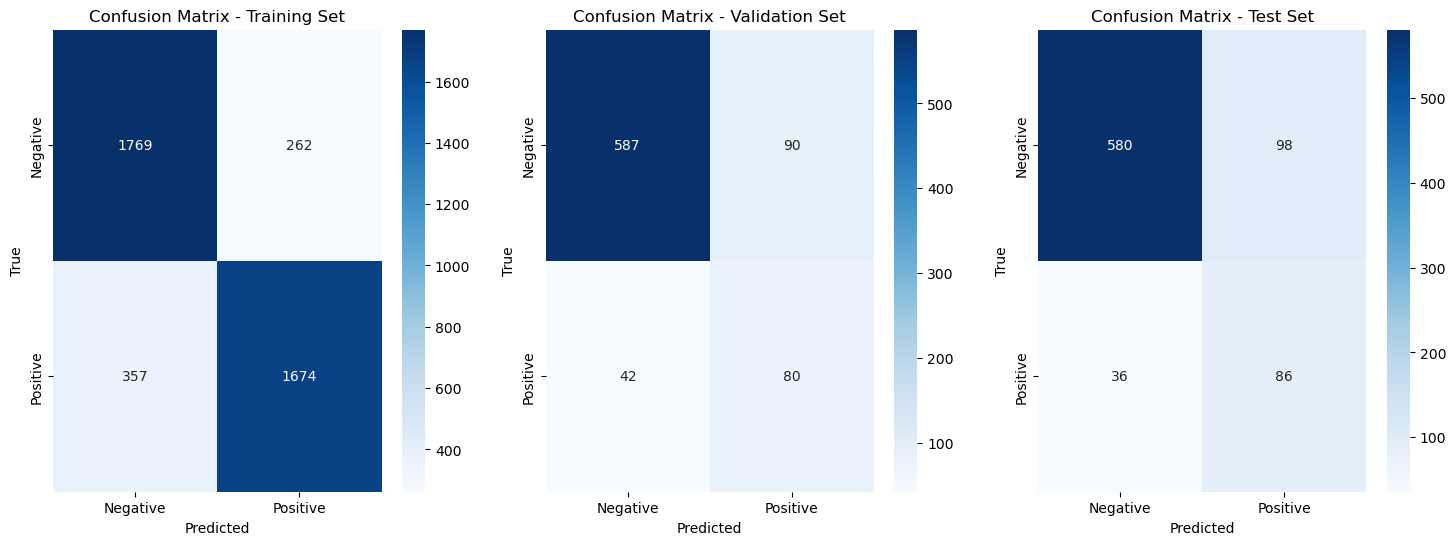

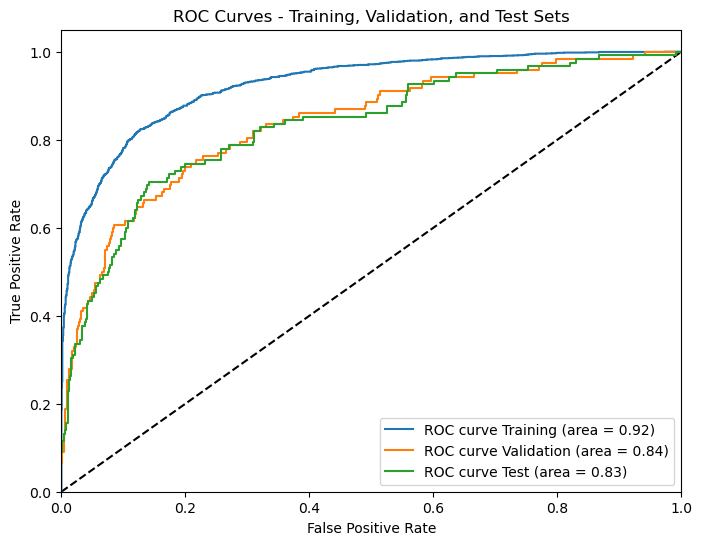


Summary of Evaluation Metrics:
      Dataset  Accuracy  Sensitivity  Specificity  Precision       AUC
0    Training  0.847612     0.824225     0.871000   0.864669  0.924672
1  Validation  0.834793     0.655738     0.867061   0.470588  0.837228
2        Test  0.832500     0.704918     0.855457   0.467391  0.831870


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_clean_dummies already has the prepared variables

# Separate the predictors and the target variable
X = df_clean_dummies.drop('Status', axis=1)
y = df_clean_dummies['Status']

# Split the data into training (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the list of numeric features to scale
numeric_features = ['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

# Define the list of categorical features (which will not be scaled)
categorical_features = [col for col in X.columns if col not in numeric_features]

# Apply SMOTE only to the training data first
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Now apply scaling to both the original and the SMOTE-applied training set
scaler = StandardScaler()

# Scale only the numeric features (after SMOTE)
X_train_scaled = X_train_sm[numeric_features].copy()
X_valid_scaled = X_valid[numeric_features].copy()
X_test_scaled = X_test[numeric_features].copy()

# Fit the scaler on the training set and then transform the validation and test sets
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_valid_scaled = scaler.transform(X_valid_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Replace the scaled numeric variables back into the original DataFrame
X_train_sm[numeric_features] = X_train_scaled
X_valid[numeric_features] = X_valid_scaled
X_test[numeric_features] = X_test_scaled

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-4, 4, num=100),          # Regularization strength (log scale from 10^-4 to 10^4)
    'l1_ratio': np.linspace(0, 1, num=100),    # Mix between L1 and L2 penalties (uniform over [0, 1])
    'penalty': ['elasticnet'],            # Elastic-net penalty
    'solver': ['saga'],                   # Use saga solver, which supports L1, L2, and elastic-net
}

# Initialize the Logistic Regression model with the saga solver
log_reg = LogisticRegression(max_iter=10000, solver='saga', penalty='elasticnet')

# Perform the random search with cross-validation
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train_sm, y_train_sm)

# Retrieve the best model found
best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model
evaluate_model(best_model, X_train_sm, y_train_sm, X_valid, y_valid, X_test, y_test)

#### K - nearest neighbors
For k-Nearest Neighbors (k-NN), we applied Z-score standardization to ensure fair distance calculations across features. Since k-NN relies on distance metrics, unscaled data can bias results toward features with larger magnitudes. Pagan et al. (2023) showed that scaling significantly improves k-NN’s performance, with Z-score consistently outperforming other methods in accuracy and efficiency across diverse datasets. Based on their findings, Z-score was selected as the default scaling method. Also, we tuned k (number of neighbors) in [1, 50], p (Minkowski exponent) in [1, 5], and experimented with different kernel weightings (e.g., uniform vs. distance-based), following the recommendations of Bischl et al. (2021). Random search was used to balance the bias-variance trade-off: small k leads to flexible but noisy models, while large k produces smoother but potentially underfitted models. We also explored different distance metrics, p=1 gives Manhattan distance, p=2 gives Euclidean distance, and higher values like p=3, p=4, etc., are generalized forms.

Best Hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 11}

Training Set Metrics:
Accuracy: 0.9015263417035942
Sensitivity: 0.9399310684391925
Specificity: 0.8631216149679961
Precision: 0.8728852309099223
AUC: 0.9698048054272513
Confusion Matrix:
 [[1753  278]
 [ 122 1909]]

Validation Set Metrics:
Accuracy: 0.8010012515644556
Sensitivity: 0.6147540983606558
Specificity: 0.8345642540620384
Precision: 0.40106951871657753
AUC: 0.809029711601327
Confusion Matrix:
 [[565 112]
 [ 47  75]]

Test Set Metrics:
Accuracy: 0.8075
Sensitivity: 0.6065573770491803
Specificity: 0.8436578171091446
Precision: 0.4111111111111111
AUC: 0.7875562164514726
Confusion Matrix:
 [[572 106]
 [ 48  74]]


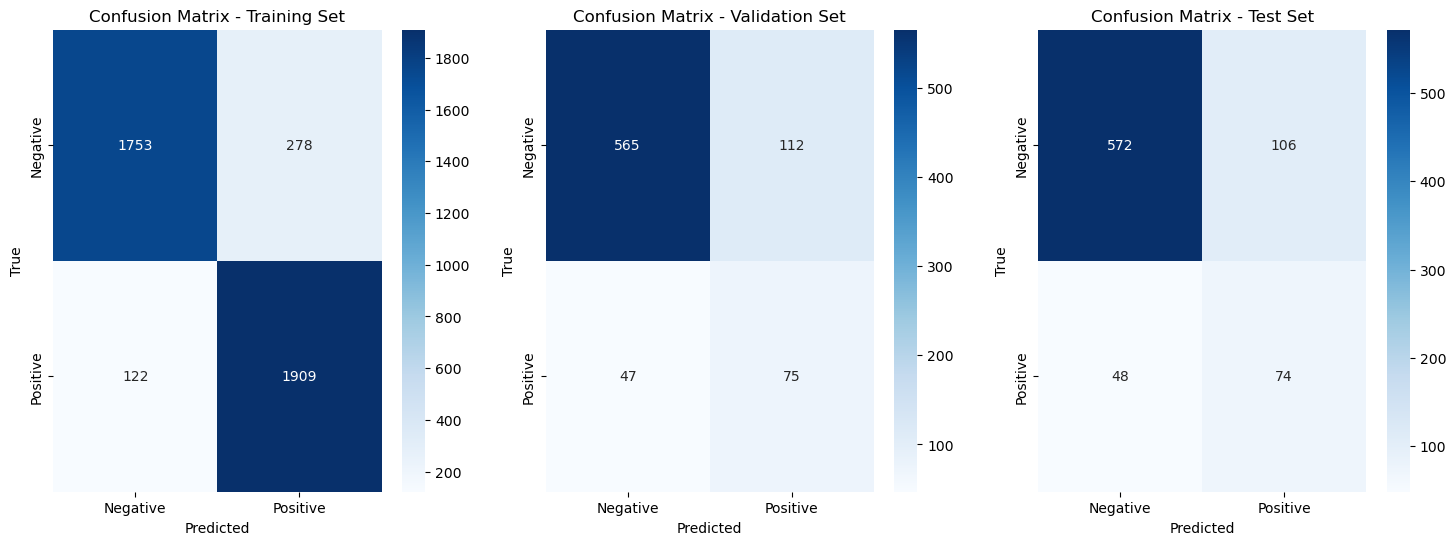

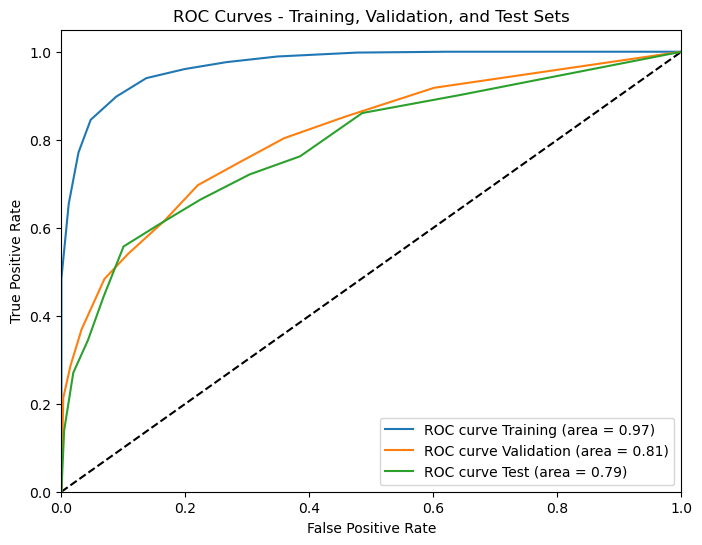


Summary of Evaluation Metrics:
      Dataset  Accuracy  Sensitivity  Specificity  Precision       AUC
0    Training  0.901526     0.939931     0.863122   0.872885  0.969805
1  Validation  0.801001     0.614754     0.834564   0.401070  0.809030
2        Test  0.807500     0.606557     0.843658   0.411111  0.787556


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_clean_dummies already has the prepared variables

# Separate the predictors and the target variable
X = df_clean_dummies.drop('Status', axis=1)
y = df_clean_dummies['Status']

# Split the data into training (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Define the list of numeric features to scale
numeric_features = ['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']

# Define the list of categorical features (which will not be scaled)
categorical_features = [col for col in X.columns if col not in numeric_features]

# Apply SMOTE only to the training data first
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Now apply scaling to both the original and the SMOTE-applied training set
scaler = StandardScaler()

# Scale only the numeric features (after SMOTE)
X_train_scaled = X_train_sm[numeric_features].copy()
X_valid_scaled = X_valid[numeric_features].copy()
X_test_scaled = X_test[numeric_features].copy()

# Fit the scaler on the training set and then transform the validation and test sets
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_valid_scaled = scaler.transform(X_valid_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

# Replace the scaled numeric variables back into the original DataFrame
X_train_sm[numeric_features] = X_train_scaled
X_valid[numeric_features] = X_valid_scaled
X_test[numeric_features] = X_test_scaled

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_neighbors': np.arange(1, 51),         # Range of k values (number of neighbors)
    'p': np.arange(1, 6),                    # Range of Minkowski distance exponents (p values)
    'weights': ['uniform', 'distance'],      # Weight strategies
}

# Initialize k-NN classifier
knn = KNeighborsClassifier()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train_sm, y_train_sm)

# Retrieve the best model found
best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model
evaluate_model(best_model, X_train_sm, y_train_sm, X_valid, y_valid, X_test, y_test)